<h1>1. Import</h1>

In [1]:
#import des librairies
%pylab inline
import numpy as np 
import pandas as pd 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from textblob import Word
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
from nltk.stem.snowball import FrenchStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import FrenchStemmer
from spellchecker import SpellChecker
from textblob import TextBlob
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC
import sklearn.naive_bayes as nb
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from xgboost import plot_importance, to_graphviz
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, auc, precision_score, recall_score
from sklearn import feature_extraction, model_selection, svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from gensim.utils import tokenize
from gensim.models import word2vec
from nltk.tokenize import sent_tokenize


Populating the interactive namespace from numpy and matplotlib


In [2]:
#ignore les warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#chargement des données
#remplacement de None par NaN
#décimal avec un point plutôt qu'une virgule dans le dataframe afin que les variables soient de type float
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')

In [4]:
#affichage des 5 premières lignes du dataframe
df.head()

,nom,pays,favorite,date,titre,bons_points,mauvais_points,note,type_etablissement,lieu,note_etablissement
0,Caroline,Belgique,1.0,2018-07-30 00:00:00,Exceptionnel,"Établissement recent, propre, soigne, chouette...",Rien,10.0,Hôtel,Paris,8.5
1,Olivier51,France,0.0,2020-03-16 00:00:00,Fabuleux,"Accueil très chaleureux, chambre calme...tout ...",NaN,9.0,Hôtel,Paris,8.5
2,Marc,France,0.0,2020-03-11 00:00:00,Exceptionnel,Tout bié sauf le wifi catastrophiquement lent!...,NaN,9.6,Hôtel,Paris,8.5
3,Marie-claire,France,0.0,2020-03-08 00:00:00,Exceptionnel,NaN,Hôtel parfait. Quartier sympa.,10.0,Hôtel,Paris,8.5
4,Pierre,France,0.0,2020-03-06 00:00:00,Fabuleux,Excellent rapport qualité prix. Personnel très...,NaN,9.0,Hôtel,Paris,8.5


<h1>2. Exploration et nettoyage des données</h1>

In [5]:
#dimensions du dataframe
print('Le dataset a {} lignes et {} colonnes.'.format(df.shape[0], df.shape[1]))

Le dataset a 30946 lignes et 11 colonnes.


In [6]:
#affichage des variables
print('Les différents variables sont : {}.'.format(df.columns.tolist()))

Les différents variables sont : ['nom', 'pays', 'favorite', 'date', 'titre', 'bons_points', 'mauvais_points', 'note', 'type_etablissement', 'lieu', 'note_etablissement'].


In [7]:
#Existe-t-il des variables non renseignées?
df.isnull().values.any()

True

In [8]:
#affichage du nombre de valeurs manquantes selon chaque variable
df.isnull().sum()

nom                    395
pays                   452
favorite                15
date                   410
titre                  432
bons_points           2359
mauvais_points        8540
note                   410
type_etablissement      15
lieu                    15
note_etablissement      15
dtype: int64

In [9]:
#type de chaque variable
df.dtypes

nom                    object
pays                   object
favorite               object
date                   object
titre                  object
bons_points            object
mauvais_points         object
note                  float64
type_etablissement     object
lieu                   object
note_etablissement    float64
dtype: object

In [10]:
#statistiques descriptives du dataset
df.describe(include='all')

,nom,pays,favorite,date,titre,bons_points,mauvais_points,note,type_etablissement,lieu,note_etablissement
count,30551,30494,30931,30536,30514,28587,22406,30536.000000,30931,30931,30931.000000
unique,5838,127,2,1246,9611,22578,18151,NaN,11,18,NaN
top,Anonyme,France,0.0,2020-02-16 00:00:00,Bien,Ce client n'a pas laissé de commentaire.,Rien,NaN,Hôtel,Paris,NaN
freq,650,25991,30211,205,4763,1502,833,NaN,25927,12888,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.977607,NaN,NaN,7.903485
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.396143,NaN,NaN,0.701262
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.300000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.100000,NaN,NaN,7.300000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,8.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,8.400000


In [11]:
#suppression des accents
#cols = df.select_dtypes(include=[np.object]).columns
#df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
#df

In [12]:
#fonction pour générer un nuage de mots
def wcloud(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df.drop(['nom', 'pays', 'favorite', 'date', 'note', 'type_etablissement', 'lieu', 'note_etablissement'],1,inplace=True)
df.head()

,titre,bons_points,mauvais_points
0,Exceptionnel,"Établissement recent, propre, soigne, chouette...",Rien
1,Fabuleux,"Accueil très chaleureux, chambre calme...tout ...",NaN
2,Exceptionnel,Tout bié sauf le wifi catastrophiquement lent!...,NaN
3,Exceptionnel,NaN,Hôtel parfait. Quartier sympa.
4,Fabuleux,Excellent rapport qualité prix. Personnel très...,NaN


In [15]:
#suppression des Nan
df = df.fillna('')
#suppression de deux phrases récurrentes dans les données
df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [16]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
for index, row in df.iterrows():
    print('index: ', index, 'col sentences:', row['titre'])

index:  0 col sentences: Exceptionnel
index:  1 col sentences: Fabuleux 
index:  2 col sentences: Exceptionnel
index:  3 col sentences: Exceptionnel
index:  4 col sentences: Fabuleux 
index:  5 col sentences: Bien 
index:  6 col sentences: Superbe
index:  7 col sentences: Très bien
index:  8 col sentences: Très bien
index:  9 col sentences: Très bien
index:  10 col sentences: sympathique
index:  11 col sentences: Très bien
index:  12 col sentences: Fabuleux 
index:  13 col sentences: Très bien
index:  14 col sentences: Nous avons adoré visiter Paris
index:  15 col sentences: Bon séjour, nuits au calme, fenêtre ouverte sur Paris!
index:  16 col sentences: Parfait
index:  17 col sentences: super agreable
index:  18 col sentences: Bien 
index:  19 col sentences: Exceptionnel
index:  20 col sentences: Fabuleux 
index:  21 col sentences: Proche université Paris Panthéon Assas
index:  22 col sentences: Exceptionnel
index:  23 col sentences: Un petit bout de paradis en plein cœur de Paris
ind

index:  263 col sentences: Agréable
index:  264 col sentences: Sans probleme
index:  265 col sentences: Bien 
index:  266 col sentences: Un peu déçue par rapport au prix
index:  267 col sentences: Nuit de transit satisfaisante
index:  268 col sentences: Bien 
index:  269 col sentences: Bon rapport qualité/prix
index:  270 col sentences: Très bien
index:  271 col sentences: Très correct
index:  272 col sentences: Agréable
index:  273 col sentences: Agréable séjour
index:  274 col sentences: Le séjour était fort charmant.
index:  275 col sentences: Bien 
index:  276 col sentences: Très bien
index:  277 col sentences: tres bien
index:  278 col sentences: Bon rapport qualité/prix
index:  279 col sentences: Très bien
index:  280 col sentences: Très bien
index:  281 col sentences: Très bien
index:  282 col sentences: Bien 
index:  283 col sentences: Très bon rapport qualité prix !
index:  284 col sentences: sejour de 3 jours correct
index:  285 col sentences: Agréable
index:  286 col sentenc

index:  462 col sentences: Fabuleux 
index:  463 col sentences: Séjour efficace pour motif professionnel : calme, bien situé, propre
index:  464 col sentences: Encore une belle expérience
index:  465 col sentences: Nous reviendrons :-))
index:  466 col sentences: Exceptionnel
index:  467 col sentences: Nuit parfaite !
index:  468 col sentences: Exceptionnel
index:  469 col sentences: Bon Séjour
index:  470 col sentences: Exceptionnel
index:  471 col sentences: Merci et bravo
index:  472 col sentences: Une bonne adresse à avoir à Paris!
index:  473 col sentences: Excellent rapport qualité prix
index:  474 col sentences: Nous avons bien aimé votre décoration intérieure, chargée mais nous faisant sentir comme à la maison
index:  475 col sentences: hotel très sympathique
index:  476 col sentences: Une découverte...
index:  477 col sentences: Exceptionnel
index:  478 col sentences: Hôtel bien situé, dans un quartier calme, proche de la station de metro Sébastopol.
index:  479 col sentences:

index:  688 col sentences: Très bien
index:  689 col sentences: Très bien
index:  690 col sentences: Weekend super avec notre concert à la salle Playel , hôtel et restaurant à proximité .
index:  691 col sentences: Très bon séjour, hôtel très bien situé et calme. Je le recommaderai à mes amis.
index:  692 col sentences: Séjour parfait !
index:  693 col sentences: Bien 
index:  694 col sentences: Ils sont agréables.
index:  695 col sentences: Trés bien
index:  696 col sentences: Fabuleux 
index:  697 col sentences: Très bien
index:  698 col sentences: Très bon séjour
index:  699 col sentences: Très bien
index:  700 col sentences: Excellent sejour
index:  701 col sentences: Bien 
index:  702 col sentences: Très bien
index:  703 col sentences: Je recommande.
index:  704 col sentences: Bien 
index:  705 col sentences: Fabuleux 
index:  706 col sentences: Bien 
index:  707 col sentences: Superbe
index:  708 col sentences: Bien 
index:  709 col sentences: super agréable
index:  710 col sente

index:  920 col sentences: Agréable
index:  921 col sentences: Séjour court et efficace
index:  922 col sentences: très bon séjour
index:  923 col sentences: Bien
index:  924 col sentences: Très bien
index:  925 col sentences: Correct.
index:  926 col sentences: Passer un aspirateur bruyant à 16h pas du tout agréable
index:  927 col sentences: Séjour agréable
index:  928 col sentences: Agréable
index:  929 col sentences: Très bien pour 2 ou 3 nuits.
index:  930 col sentences: Tres bon choix si l'on veut être près de l'Opéra Bastille.
index:  931 col sentences: Très bien
index:  932 col sentences: bon accueil, bon rapport qualité/prix
index:  933 col sentences: Très bien
index:  934 col sentences: Agréable
index:  935 col sentences: Bien 
index:  936 col sentences: Pour une nuit de 23h à 7h, c'est pour moi bien suffisant !
index:  937 col sentences: Bien 
index:  938 col sentences: bien passé
index:  939 col sentences: Bien 
index:  940 col sentences: Très bien
index:  941 col sentences

index:  1155 col sentences: L'hostel est plutôt bien mais manque de cuisine commune et quelques problèmes durant mon séjour
index:  1156 col sentences: Bien 
index:  1157 col sentences: Bien 
index:  1158 col sentences: Agréable
index:  1159 col sentences: Superbe
index:  1160 col sentences: Bien 
index:  1161 col sentences: Fabuleux 
index:  1162 col sentences: Bien 
index:  1163 col sentences: Très bien
index:  1164 col sentences: Fabuleux 
index:  1165 col sentences: Une des meilleures auberges de la ville.
index:  1166 col sentences: super pour la partie couchage
index:  1167 col sentences: Bien 
index:  1168 col sentences: Bien 
index:  1169 col sentences: Agréable
index:  1170 col sentences: Très bien
index:  1171 col sentences: Bien 
index:  1172 col sentences: Bien 
index:  1173 col sentences: as revenir avec des potes
index:  1174 col sentences: Fabuleux 
index:  1175 col sentences: Une belle réussite !
index:  1176 col sentences: Bien 
index:  1177 col sentences: Agréable
ind

index:  1375 col sentences: Très bien
index:  1376 col sentences: Calme, confort, sans chichi.
index:  1377 col sentences: Bien 
index:  1378 col sentences: 1 nuit à Paris
index:  1379 col sentences: 3 étoiles confortable et bien placé
index:  1380 col sentences: Bien 
index:  1381 col sentences: Séjour
index:  1382 col sentences: idéal pour un voyage d'affaires ou un court séjour- situation géographique et calme assurés
index:  1383 col sentences: Hotel très pratique si on va a Roland Garros ce qui est notre cas.
index:  1384 col sentences: Hotel confortable et très bien placé mais difficile d'accès (escaliers)
index:  1385 col sentences: Bien 
index:  1386 col sentences: Agréable
index:  1387 col sentences: Super pour business
index:  1388 col sentences: Je reviendrai
index:  1389 col sentences: Très bien
index:  1390 col sentences: Exceptionnel
index:  1391 col sentences: C’était bien passer
index:  1392 col sentences: Bien 
index:  1393 col sentences: Bien 
index:  1394 col sentenc

index:  1598 col sentences: Très beau week-end parisien !
index:  1599 col sentences: Bon plan
index:  1600 col sentences: Très bien
index:  1601 col sentences: Sans plus
index:  1602 col sentences: Bonheur de parcourir de nouvelles expositions
index:  1603 col sentences: Contente mais pas enthousiaste !
index:  1604 col sentences: Bien 
index:  1605 col sentences: Exceptionnel
index:  1606 col sentences: Excellent, à recommander !
index:  1607 col sentences: Bien 
index:  1608 col sentences: Mon mari et moi avons particulièrement apprécié cette étape
index:  1609 col sentences: Excellent
index:  1610 col sentences: Bien 
index:  1611 col sentences: Bien 
index:  1612 col sentences: Exceptionnel
index:  1613 col sentences: TRÈS BON SEJOUR
index:  1614 col sentences: Un hôtel idéal pour un séjour de luxe !
index:  1615 col sentences: Exceptionnel
index:  1616 col sentences: Exceptionnel
index:  1617 col sentences: Très bien
index:  1618 col sentences: Exceptionnel
index:  1619 col sente

index:  1904 col sentences: Bon 
index:  1905 col sentences: Agréable
index:  1989 col sentences: Exceptionnel
index:  1990 col sentences: On ne se sent pas dans un hotel mais comme chez soi.
index:  1991 col sentences: Excellente adresse
index:  1992 col sentences: Agréable nuit
index:  1993 col sentences: Très bien
index:  1994 col sentences: Très bien
index:  1995 col sentences: Très bien
index:  1996 col sentences: Fabuleux 
index:  1997 col sentences: Nuit à la campagne dans Paris
index:  1998 col sentences: une pause appréciable pour affronter l'effervescence de la vie parisienne
index:  1999 col sentences: Exceptionnel
index:  2000 col sentences: peux mieux faire pour ce prix
index:  2001 col sentences: Une oasis tranquille et douillette pour se reposer d’une journée parisienne
index:  2002 col sentences: Bien 
index:  2003 col sentences: Un havre de paix au milieu de nulle part, en plein Paris
index:  2004 col sentences: une adresse à retenir pour un prochain séjour
index:  200

index:  2236 col sentences: Très bien
index:  2237 col sentences: Séjour agréable
index:  2238 col sentences: Agréable
index:  2239 col sentences: Bon séjour
index:  2240 col sentences: Agréable
index:  2241 col sentences: Bien
index:  2242 col sentences: Bon emplacement. Confort correct malgré étroitesse des chambres.
index:  2243 col sentences: Bien 
index:  2244 col sentences: c’est bien
index:  2245 col sentences: Dans l’ensemble ( pour 2 / 3 jours c'est bien ) le+,la proximité avec la tour Eiffel et le trocadéro
index:  2246 col sentences: Bon moment , mais la déco de l'accueil est a revoir
index:  2247 col sentences: Bien 
index:  2248 col sentences: Agréable
index:  2249 col sentences: Bof
index:  2250 col sentences: Très bien
index:  2251 col sentences: Bien 
index:  2252 col sentences: Le prix augmente, pas la qualité. Look moderne sans véritable comptoir. Or le système fonctionne mal
index:  2253 col sentences: Bien 
index:  2254 col sentences: Agréable
index:  2255 col sente

index:  2519 col sentences: bon séjour à Paris
index:  2520 col sentences: Bon 
index:  2521 col sentences: Agréable.
index:  2522 col sentences: Bien 
index:  2523 col sentences: correct.
index:  2524 col sentences: Bien pour une nuit
index:  2525 col sentences: Bien 
index:  2526 col sentences: Bien 
index:  2527 col sentences: Mitigée
index:  2528 col sentences: Bon 
index:  2529 col sentences: Agréable
index:  2530 col sentences: Bien pour une nuit rapport qualité prix promotionnel c'est tout
index:  2531 col sentences: Grève
index:  2532 col sentences: Passable
index:  2533 col sentences: Agréable
index:  2534 col sentences: Séjour de trois jours
index:  2535 col sentences: Passable
index:  2536 col sentences: Bien dans l'ensemble sauf les deux réveils très matinaux organisés par la CGT. Scandaleux.
index:  2537 col sentences: Besoin de rafraîchissement
index:  2538 col sentences: Très moyen car il faut payer pour accéder à la piscine
index:  2539 col sentences: Peut mieux faire
i

index:  2724 col sentences: Bien 
index:  2725 col sentences: Bon séjour
index:  2726 col sentences: Bien 
index:  2727 col sentences: Séjour très agréable. Personnel accueillant
index:  2728 col sentences: Rapport qualité prix assuré
index:  2729 col sentences: Bien 
index:  2730 col sentences: Moyen.
index:  2731 col sentences: Agréable
index:  2732 col sentences: Bien 
index:  2733 col sentences: correct
index:  2734 col sentences: Hôtel sommaire mais très correct au regard du tarif
index:  2735 col sentences: Bonne adresse
index:  2736 col sentences: Bien 
index:  2737 col sentences: Agréable et confortable
index:  2738 col sentences: Bien 
index:  2739 col sentences: Tres bien situé dans le quartier de Montmartre, et calme
index:  2740 col sentences: Bien 
index:  2741 col sentences: Qualité moyenne
index:  2742 col sentences: Très bien
index:  2743 col sentences: Nuit correcte vu le prix très démocratique de la chambre.
index:  2744 col sentences: Bon rapport qualité prix
index: 

index:  2952 col sentences: Bien 
index:  2953 col sentences: Agréable
index:  2954 col sentences: hotel calme restaurant et salle de déjeuner accueillants Brigitte
index:  2955 col sentences: Agréable
index:  2956 col sentences: Séjour agréable et personnel aux petits soins.
index:  2957 col sentences: Agréable
index:  2958 col sentences: Accueil de certains employés au top et d’autres déplorable
index:  2959 col sentences: Agréable
index:  2960 col sentences: Bien 
index:  2961 col sentences: Très agreable
index:  2962 col sentences: Bien 
index:  2963 col sentences: Agréable
index:  2964 col sentences: Bon 
index:  2965 col sentences: Agréable
index:  2966 col sentences: Porte d'Italie
index:  2967 col sentences: Agréable
index:  2968 col sentences: Bien 
index:  2969 col sentences: Bon plan pour un court séjour
index:  2970 col sentences: Satisfaite
index:  2971 col sentences: Bien 
index:  2972 col sentences: Agréable séjour
index:  2973 col sentences: Bien 
index:  2974 col sente

index:  3135 col sentences: Très satisfaisant
index:  3136 col sentences: Hôtel très sympa et confortable
index:  3137 col sentences: Détestable
index:  3138 col sentences: Bien 
index:  3139 col sentences: Bon hôtel mais ne pas y sortir
index:  3140 col sentences: Confortable
index:  3141 col sentences: Ça dépanne
index:  3142 col sentences: cool
index:  3143 col sentences: Bien mais très mal situé.
index:  3144 col sentences: Bien 
index:  3145 col sentences: Bien 
index:  3146 col sentences: Très bien
index:  3147 col sentences: Bien 
index:  3148 col sentences: Agréable
index:  3149 col sentences: Excellent
index:  3150 col sentences: Très bon hôtel mais je déconseille pour une famille à cause du quartier
index:  3151 col sentences: Très bien
index:  3152 col sentences: Bien 
index:  3153 col sentences: Parfait mais quartier moyen
index:  3154 col sentences: Très bien
index:  3155 col sentences: Parfait dans la chambre, surtout ne pas sortir
index:  3156 col sentences: Agréable
ind

index:  3342 col sentences: Hôtel bien devrait revoir l’aménagement des chambres c’e Dommage le reste est bien
index:  3343 col sentences: Bon 
index:  3344 col sentences: Bien 
index:  3345 col sentences: Excellent rapport qualité prix
index:  3346 col sentences: Pratique au niveau de sa situation mais prévoir le petit déjeuner ailleurs
index:  3347 col sentences: Très bien un service accueillant des personnels très gentilles
index:  3348 col sentences: Rien n’a dire
index:  3349 col sentences: Superbe
index:  3350 col sentences: Superbe
index:  3351 col sentences: Bien 
index:  3352 col sentences: Bon rapport qualité prix
index:  3353 col sentences: Très bien
index:  3354 col sentences: Bon 
index:  3355 col sentences: Bien 
index:  3356 col sentences: Bon 
index:  3357 col sentences: Séjour très agreable.
index:  3358 col sentences: Agréable
index:  3359 col sentences: bien
index:  3360 col sentences: Bien 
index:  3361 col sentences: Superbe
index:  3362 col sentences: Juste un end

index:  3559 col sentences: C etait tres bien ce serait encore mieux s il y avait une porte a la place du rideau dans la douche
index:  3560 col sentences: Bof...
index:  3561 col sentences: Très bien
index:  3562 col sentences: A oublié au plus vite
index:  3563 col sentences: Agréable
index:  3564 col sentences: Bien 
index:  3565 col sentences: Désagréable mais à retenter
index:  3566 col sentences: Bien situé mais hôtel délabré dont la propreté peut laisser à désirer
index:  3567 col sentences: Peut mieux faire!
index:  3568 col sentences: En ordre
index:  3569 col sentences: Bien pour une nuit voir 2 pas plus !
index:  3570 col sentences: Bien 
index:  3571 col sentences: ok pour un court sejour
index:  3572 col sentences: Bien 
index:  3573 col sentences: Hôtel sans chichi,parfait pour un court séjour,pour voyageurs aux gouts simples, tenant à la propret
index:  3574 col sentences: Séjour agréable
index:  3575 col sentences: Très bon séjour
index:  3576 col sentences: Personnel d

index:  3769 col sentences: Très bon accueil
index:  3770 col sentences: Parfait pour une nuit, rapport qualité prix excellent.
index:  3771 col sentences: Agréable
index:  3772 col sentences: Un accueil agréable, le personnel est arrangeant, les chambres simples, le quartier "chaud".
index:  3773 col sentences: Joli petit hôtel confortable mais le quartier lui n'est pas le plus joli du 18e
index:  3774 col sentences: Séjour agréable dans un hôtel agréable où nous avons pu profiter de la cour intérieur
index:  3775 col sentences: Confortable
index:  3776 col sentences: Très bien
index:  3777 col sentences: Hôtel très agréable pour 1-2 nuits
index:  3778 col sentences: Bien 
index:  3779 col sentences: Passable
index:  3780 col sentences: hotel pas cher bon accueil mais chambre a revoir nottement la salle de bain
index:  3781 col sentences: Agréable
index:  3782 col sentences: Lits infesté de punaises....
index:  3783 col sentences: Il fait tres froid en janvier à paris
index:  3784 col

index:  4002 col sentences: Bien 
index:  4003 col sentences: Bon 
index:  4004 col sentences: Très agréable, je vais y retourner
index:  4005 col sentences: Agréable
index:  4006 col sentences: Bien 
index:  4007 col sentences: Passable
index:  4008 col sentences: Bien 
index:  4009 col sentences: Agréable
index:  4010 col sentences: Bof
index:  4011 col sentences: Passable
index:  4012 col sentences: Petit hôtel dans quartier agréable. Grande chambre dont l'entretien courant mérite d'être amélioré
index:  4013 col sentences: Passable
index:  4014 col sentences: hôtel qui convenait pour une seule nuit
index:  4015 col sentences: Bien 
index:  4016 col sentences: Ne correspond pas à ce qu'on attend d'un 3 étoiles.
index:  4017 col sentences: Passable
index:  4018 col sentences: Bien 
index:  4019 col sentences: Bien 
index:  4020 col sentences: content de partir :)
index:  4021 col sentences: Passable
index:  4022 col sentences: ...
index:  4023 col sentences: Agréable
index:  4024 col

index:  4236 col sentences: séjour confortable, excellente étape
index:  4237 col sentences: Accueil pitoyable.
index:  4238 col sentences: A refaire
index:  4239 col sentences: Passable
index:  4240 col sentences: Agréable
index:  4241 col sentences: Pour 1 nuit
index:  4242 col sentences: Bien 
index:  4243 col sentences: Dans l'ensemble ça s'est bien passé.. quelques petits trucs à revoir.
index:  4244 col sentences: Agréable pour y passer une nuit
index:  4245 col sentences: Bien 
index:  4246 col sentences: Bien 
index:  4247 col sentences: magnifique
index:  4248 col sentences: Agréable
index:  4249 col sentences: Confort largement suffisant pour un court séjour !
index:  4250 col sentences: Bien 
index:  4251 col sentences: Agréable
index:  4252 col sentences: parfait
index:  4253 col sentences: Agréable
index:  4254 col sentences: Agréable
index:  4255 col sentences: Rapide discret et confortable.
index:  4256 col sentences: ras
index:  4257 col sentences: Agréable
index:  4258

index:  4454 col sentences: Plutôt bien dans l'ensemble
index:  4455 col sentences: Superbe
index:  4456 col sentences: Dans l'ensemble c'est bien
index:  4457 col sentences: moyen mais bien placé
index:  4458 col sentences: Très bien
index:  4459 col sentences: Agréable
index:  4460 col sentences: Bon séjour mais je connaissais déjà l'hôtel et j'y suis retournee avec plaisir
index:  4461 col sentences: Un excellent hôtel, très bien situé, au bon rapport qualité-prix
index:  4462 col sentences: Superbe
index:  4463 col sentences: Bien 
index:  4464 col sentences: Séjour agréable
index:  4465 col sentences: très bon séjour
index:  4466 col sentences: Bien
index:  4467 col sentences: parfait rapport qualité prix
index:  4468 col sentences: notre 4e pasage ds cet hôtel, tjs satisfaits
index:  4469 col sentences: Propre et Agréable
index:  4470 col sentences: Séjour rapide, mais tout à fait conforme à ce qui était annoncé. Rapport qualité/prix parfait.
index:  4471 col sentences: Superbe
i

index:  4697 col sentences: Chambre avec charme ancien super bien "home-stagée". Petit déj beaucoup trop basique dommage
index:  4698 col sentences: Très bien
index:  4699 col sentences: Accueil agréable bon petit déjeuner mais gâché par le bruit la nuit
index:  4700 col sentences: Propre!
index:  4701 col sentences: Pas agréable
index:  4702 col sentences: Hôtel pratique et agréable
index:  4703 col sentences: Agréable
index:  4704 col sentences: Prix affiché en chambre trop élevé par rapport aux prestations donc voir offre Booking
index:  4705 col sentences: Séjour agréable sans mauvaise surprise en dehors du manque d'ascenseur. Hôtel propre et accueillant
index:  4706 col sentences: Hôtel bien situé, agréable avec un bon rapport qualité prix
index:  4707 col sentences: Hôtel de première nécessité
index:  4708 col sentences: Hôtel très propre et agréable, à deux pas du cimetière du Père Lachaise et accès rapide au Métro.
index:  4709 col sentences: Bien 
index:  4710 col sentences: B

index:  5018 col sentences: Bien 
index:  5019 col sentences: Nous y retournerons
index:  5020 col sentences: Bon séjour
index:  5021 col sentences: Agréable
index:  5022 col sentences: Bon séjour
index:  5023 col sentences: Très bien
index:  5024 col sentences: Très bon sejour
index:  5025 col sentences: Très bien
index:  5026 col sentences: très bien
index:  5027 col sentences: Fabuleux 
index:  5028 col sentences: Agréable
index:  5029 col sentences: Bien 
index:  5030 col sentences: bon emplacement
index:  5031 col sentences: Suffisant pour le rapport qualité-prix et bon emplacement
index:  5032 col sentences: Fabuleux 
index:  5033 col sentences: C'est un excellent rapport qualité prix. avec un parking appréciable et la proximité du métro. C'est
index:  5034 col sentences: Très bien
index:  5035 col sentences: Jours tranquilles à Paris
index:  5036 col sentences: Idéal pour une pause avant de repartir
index:  5037 col sentences: Sympa
index:  5038 col sentences: Bon accueil... Tou

index:  5298 col sentences: Agréable
index:  5299 col sentences: Du bon et du moins bon
index:  5300 col sentences: bien mais mauvaise literie
index:  5301 col sentences: Bon 
index:  5302 col sentences: Très bon emplacement. Petite rue calme. J'y reviendrai avec grand plaisir.
index:  5303 col sentences: Bon 
index:  5304 col sentences: Très bien
index:  5305 col sentences: Hôtel bien placé et idéal pour un séjour court.
index:  5306 col sentences: Agréable
index:  5307 col sentences: Très bien
index:  5308 col sentences: Bon emplacement et personnel très aimable.Idéal pour un déplacement professionnel
index:  5309 col sentences: correct
index:  5310 col sentences: Agréable
index:  5311 col sentences: Très bon accueil, hôtel plein de charme. Chambre joliment rénovée, mais mal insonorisée.
index:  5312 col sentences: Situation au top pour moi, un peu cher
index:  5314 col sentences: Très sympa
index:  5315 col sentences: Très correct grâce à la gentillesse de l'accueil et la propreté
i

index:  5605 col sentences: pas du tout ce que j'attendais.
index:  5606 col sentences: Passable
index:  5607 col sentences: Très bon séjour mais dommage que la réception de la télévision soit mauvaise.
index:  5608 col sentences: Agréable
index:  5609 col sentences: Agréable
index:  5610 col sentences: Passable
index:  5611 col sentences: Très bon hotel de passage pour un motif professionnel. Bon rapport qualité / prix
index:  5612 col sentences: Agréable
index:  5613 col sentences: Bon 
index:  5614 col sentences: si j'avais su, je serai aller ailleurs
index:  5615 col sentences: Agréable
index:  5616 col sentences: Bien 
index:  5617 col sentences: L'hotel est bien situer pour tous faire ,les riverains et gens du 9 ème arrondissement sont courtois
index:  5618 col sentences: Décevant
index:  5619 col sentences: Médiocre
index:  5620 col sentences: Chaotique
index:  5621 col sentences: Je me suis juste fais voler
index:  5622 col sentences: Mauvais
index:  5623 col sentences: Séjour 

index:  5828 col sentences: Bien 
index:  5829 col sentences: Séjour 2nuits
index:  5830 col sentences: Très bien
index:  5831 col sentences: Bien dans l'ensemble.
index:  5832 col sentences: Bon rapport qualité prix mais c est tout...
index:  5833 col sentences: Agréable
index:  5834 col sentences: Agréable hôtel calme Malgré la proximité des puces de Saint-Ouen
index:  5835 col sentences: Pas cher, propre et fonctionnelle
index:  5836 col sentences: Hôtel de base correct pour un court sejour
index:  5837 col sentences: Mon séjour était parfait, à refaire si seulement que ça soit plus propre, qualité prix rien à dire
index:  5838 col sentences: Des punaises de lit et aucun geste commercial...
index:  5839 col sentences: Agréable
index:  5840 col sentences: Bien
index:  5841 col sentences: Bon cadre pour un séjour parisien
index:  5842 col sentences: Séjour pro convenable.
index:  5843 col sentences: Agréable
index:  5844 col sentences: Bien 
index:  5845 col sentences: Séjour mitigé, 

index:  6046 col sentences: Bien 
index:  6047 col sentences: Convenable.
index:  6048 col sentences: Très bien
index:  6049 col sentences: Situation idéale et chambre confortable mais un peu petite
index:  6050 col sentences: Bien 
index:  6051 col sentences: Bien 
index:  6052 col sentences: Agréable
index:  6053 col sentences: Pas de séjour à PARIS
index:  6054 col sentences: Satisfait,excellent emplacement
index:  6055 col sentences: Pour une nuit de bivouac OK, mais pas adapté à mon séjour de quatre jours
index:  6056 col sentences: Parfait comme toujours
index:  6057 col sentences: Passable
index:  6058 col sentences: Bien situé mais...
index:  6059 col sentences: Exceptionnel
index:  6060 col sentences: Decevant
index:  6061 col sentences: Excellent
index:  6062 col sentences: Exceptionnel
index:  6063 col sentences: Passable
index:  6064 col sentences: Exceptionnel
index:  6065 col sentences: Exceptionnel
index:  6066 col sentences: Passable
index:  6067 col sentences: Super ma

index:  6310 col sentences: agréable
index:  6314 col sentences: Exceptionnel
index:  6315 col sentences: Très bien
index:  6316 col sentences: Bien 
index:  6317 col sentences: Bien 
index:  6318 col sentences: Bien 
index:  6319 col sentences: Bien pour un court séjour.
index:  6320 col sentences: Bien
index:  6321 col sentences: Agréable
index:  6322 col sentences: Impeccable
index:  6323 col sentences: Pas très bien dormi
index:  6324 col sentences: Bien mais
index:  6325 col sentences: Séjour agréable
index:  6326 col sentences: séjour agréable, je recommande
index:  6327 col sentences: pour une nuit et le petit déjeuner ca va
index:  6328 col sentences: Rapport qualité/prix OK.
index:  6329 col sentences: Agréable
index:  6330 col sentences: Agréable
index:  6331 col sentences: Bien 
index:  6332 col sentences: Parfait
index:  6333 col sentences: Trés bon rapport qualité/prix, hotel simple mais confortable, bien placé , trés pour un court séjour
index:  6334 col sentences: Bien 


index:  6543 col sentences: Bien 
index:  6544 col sentences: Très bien
index:  6545 col sentences: Je recommande cet hôtel
index:  6546 col sentences: On y reviendra.
index:  6547 col sentences: Endroit calme et agréable
index:  6548 col sentences: Très bien et conforme à mes attentes
index:  6549 col sentences: Excellent séjour dans ce petit hôtel !
index:  6550 col sentences: Très bien
index:  6551 col sentences: Très bien
index:  6552 col sentences: Très bien
index:  6553 col sentences: Bien 
index:  6554 col sentences: Très bien
index:  6555 col sentences: Séjour sympathique tout à fait conforme à mes attentes.
index:  6556 col sentences: Bien 
index:  6557 col sentences: Très bien
index:  6558 col sentences: Parfait
index:  6559 col sentences: Agréable
index:  6560 col sentences: Très bien
index:  6561 col sentences: pour une nuit ok pour plusieurs nuit non....
index:  6562 col sentences: Bien 
index:  6563 col sentences: Bien 
index:  6564 col sentences: Agréable
index:  6565 co

index:  6770 col sentences: Bien 
index:  6771 col sentences: Super
index:  6772 col sentences: Très bien
index:  6773 col sentences: Court et efficace
index:  6774 col sentences: Très bon rapport qualité prix
index:  6775 col sentences: Bien
index:  6776 col sentences: Bien 
index:  6777 col sentences: Agréable séjour pour découvrir Montmartre
index:  6778 col sentences: Bien 
index:  6779 col sentences: Bien
index:  6780 col sentences: Montmartre
index:  6781 col sentences: Très bien
index:  6782 col sentences: Agréable
index:  6783 col sentences: Dans l'ensemble bon établissement.
index:  6784 col sentences: Bon séjour pour 2 nuits
index:  6785 col sentences: Bien 
index:  6786 col sentences: Bon rapport qualité prix service serviable et accueillant.
index:  6787 col sentences: Bien 
index:  6788 col sentences: Une arnaque à la taxe de séjour
index:  6789 col sentences: Bien 
index:  6790 col sentences: Petit hôtel sympathique
index:  6791 col sentences: Hôtel propre. Bon rapport qu

index:  6992 col sentences: accueil et amabilité ainsi que prestations hotelières toujours régulières au fil des années
index:  6993 col sentences: Bon standing, excellent emplacement
index:  6994 col sentences: Exceptionnel
index:  6995 col sentences: Exceptionnel
index:  6996 col sentences: Très bon week-end Parisien
index:  6997 col sentences: Nous reviendrons !
index:  6998 col sentences: Exceptionnel
index:  6999 col sentences: Exceptionnel
index:  7000 col sentences: Excellent!
index:  7001 col sentences: Fabuleux 
index:  7002 col sentences: Très bien
index:  7003 col sentences: Très bien
index:  7004 col sentences: Très bien
index:  7005 col sentences: Bien 
index:  7006 col sentences: Fabuleux 
index:  7007 col sentences: Exceptionnel
index:  7008 col sentences: Tres bien
index:  7009 col sentences: Exceptionnel
index:  7010 col sentences: Bien 
index:  7011 col sentences: Bien 
index:  7012 col sentences: Bien 
index:  7013 col sentences: A refaire sans hésiter
index:  7014 c

index:  7324 col sentences: Exceptionnel
index:  7325 col sentences: Exceptionnel
index:  7326 col sentences: Très bon hôtel compte tenu du rapport qualité-prix. Bonne situation à la porte de Paris.
index:  7327 col sentences: Hôtel parfait après un classico!!
index:  7328 col sentences: Bien 
index:  7329 col sentences: Exceptionnel
index:  7330 col sentences: Mon week-end était juste top grâce a cette hôtel hôtel idéal pour aller au parc des princes .
index:  7331 col sentences: Super à recommander
index:  7332 col sentences: Exceptionnel
index:  7333 col sentences: Très agréable
index:  7334 col sentences: Bien 
index:  7335 col sentences: Exceptionnel
index:  7336 col sentences: Parfait pour un petit séjour parisien.
index:  7337 col sentences: Très bien
index:  7338 col sentences: Exceptionnel
index:  7339 col sentences: Exceptionnel
index:  7340 col sentences: Très bel hôtel
index:  7341 col sentences: Fabuleux 
index:  7342 col sentences: Excellent hôtel
index:  7343 col sentenc

index:  7613 col sentences: Séjour agréable.
index:  7614 col sentences: je ne retournerai jamais dans cet hotel désolé
index:  7615 col sentences: Passable
index:  7616 col sentences: Moyen
index:  7617 col sentences: heureusement que l'emplacement est exceptionnel
index:  7618 col sentences: Décevant
index:  7619 col sentences: Décevant
index:  7620 col sentences: Passable
index:  7621 col sentences: Fabuleux 
index:  7622 col sentences: Passable
index:  7623 col sentences: Fabuleux 
index:  7624 col sentences: très bien
index:  7625 col sentences: Passable
index:  7626 col sentences: A oublier
index:  7645 col sentences: Exceptionnel
index:  7646 col sentences: Bien 
index:  7647 col sentences: Mon séjour a été correct.
index:  7648 col sentences: Agréable
index:  7649 col sentences: Excellent rapport qualité/prix
index:  7650 col sentences: Pas le luxe mais bien
index:  7651 col sentences: Bien 
index:  7652 col sentences: Très bien
index:  7653 col sentences: Très bien
index:  765

index:  7917 col sentences: Exceptionnel
index:  7918 col sentences: Séjour parfait dans un arrondissement central.
index:  7919 col sentences: Bien 
index:  7920 col sentences: Superbe
index:  7921 col sentences: Impeccable
index:  7922 col sentences: Bien 
index:  7923 col sentences: agréable et confortable
index:  7924 col sentences: Waouh
index:  7925 col sentences: For
index:  7926 col sentences: Décevant
index:  7927 col sentences: Une vue imprenable sur Paris
index:  7928 col sentences: Passable
index:  7929 col sentences: Passable
index:  7930 col sentences: Dommage
index:  7931 col sentences: Agréable
index:  7932 col sentences: Exceptionnel
index:  7933 col sentences: Séjour parfait
index:  7934 col sentences: Chambre un peut vieille attention pas du tout comme sur la photo Booking.com
index:  7935 col sentences: Exceptionnel
index:  7936 col sentences: Ce pourrait être un bijou mais c’est sale et ordinaire
index:  7937 col sentences: Passable
index:  7938 col sentences: Agré

index:  8310 col sentences: Très bien
index:  8311 col sentences: Superbe
index:  8312 col sentences: Très bon hotel
index:  8313 col sentences: Très bonne surprise
index:  8314 col sentences: Presque parfait
index:  8315 col sentences: Fabuleux 
index:  8316 col sentences: Hôtellerie de qualité
index:  8317 col sentences: Fabuleux 
index:  8318 col sentences: Très bien
index:  8319 col sentences: Bien 
index:  8320 col sentences: Exceptionnel
index:  8321 col sentences: Séjour agréable ambiance d'hôtel familiale appréciée
index:  8322 col sentences: Bien 
index:  8323 col sentences: Très bien
index:  8324 col sentences: Très bien
index:  8325 col sentences: Bien 
index:  8326 col sentences: Fabuleux 
index:  8327 col sentences: Bien 
index:  8328 col sentences: Bien 
index:  8329 col sentences: Très bien
index:  8330 col sentences: Très bien
index:  8331 col sentences: Séjour parfait dans cet hôtel pour un tarif contenu.
index:  8332 col sentences: Très bien
index:  8333 col sentences

index:  8586 col sentences: Très bien
index:  8587 col sentences: Bien 
index:  8588 col sentences: mon sejour etait bien.
index:  8589 col sentences: Ce fut un très bon séjour avec ma soeur.
index:  8590 col sentences: sans surprise, conforme à la description
index:  8591 col sentences: Bon rapport qualité prix
index:  8592 col sentences: Fabuleux 
index:  8593 col sentences: Bon rapport qualité -prix. Nous y retournerons au prochain concert de la Philharmonie
index:  8594 col sentences: Agréable
index:  8595 col sentences: Agréable
index:  8596 col sentences: Très bien
index:  8597 col sentences: Bien 
index:  8598 col sentences: Très bien
index:  8599 col sentences: Il ne manquait pas grand chose pour que ce soit parfait !!
index:  8600 col sentences: Très bien
index:  8601 col sentences: Très bien
index:  8602 col sentences: Bien 
index:  8603 col sentences: Pour une nuit
index:  8604 col sentences: Très bien
index:  8605 col sentences: Une prestation de très bonne qualité sur un r

index:  8869 col sentences: Bon établissement situé à Gare de Lyon
index:  8870 col sentences: Bien 
index:  8871 col sentences: Bien
index:  8872 col sentences: Bien 
index:  8873 col sentences: Très bien
index:  8874 col sentences: Agréable
index:  8875 col sentences: Superbe
index:  8876 col sentences: ideal
index:  8877 col sentences: Fabuleux 
index:  8878 col sentences: Fabuleux 
index:  8879 col sentences: Sympa et conforme à nos attentes
index:  8880 col sentences: Localisation très pratique.
index:  8881 col sentences: Ça depanne
index:  8882 col sentences: Superbe
index:  8883 col sentences: Séjour hyper fonctionnel !!!
index:  8884 col sentences: court pour etre decu sur ma facture:
index:  8885 col sentences: Bien 
index:  8886 col sentences: Bien 
index:  8887 col sentences: Bien 
index:  8888 col sentences: Bien 
index:  8889 col sentences: Fabuleux 
index:  8890 col sentences: Très bien
index:  8891 col sentences: Fabuleux 
index:  8892 col sentences: Bien 
index:  8893 

index:  9220 col sentences: Bien 
index:  9221 col sentences: C’est parfait
index:  9222 col sentences: Fabuleux 
index:  9223 col sentences: Un hôtel sympathique et confortable
index:  9224 col sentences: Fabuleux 
index:  9225 col sentences: Très proche Gare du Nord, très calme, parfait.
index:  9226 col sentences: Bien 
index:  9227 col sentences: Superbe
index:  9228 col sentences: Bien 
index:  9229 col sentences: Superbe
index:  9230 col sentences: Hotel très agréable à proximité de Poissonnière
index:  9231 col sentences: Très bien
index:  9232 col sentences: Séjour agréable et qualité prix au rdv pour un hôtel dans Paris
index:  9233 col sentences: Un bon hôtel, bien situé dans une rue calme ...
index:  9234 col sentences: Bien 
index:  9235 col sentences: Une bonne etape
index:  9236 col sentences: Superbe
index:  9237 col sentences: Bien 
index:  9238 col sentences: Exceptionnel
index:  9239 col sentences: Exceptionnel
index:  9240 col sentences: Déçu du bruit général.
index:

index:  9491 col sentences: Hôtel conforme à ce que j’attendais
index:  9492 col sentences: Bien 
index:  9493 col sentences: rapport qualité prix correct pour Paris pour une seule nuit
index:  9494 col sentences: Bien 
index:  9495 col sentences: Passable
index:  9496 col sentences: Très bien comme dortoir
index:  9497 col sentences: Hotel bon marché de qualité moyenne et dans un quartier chaud mais pour 2 nuits, pourquoi pas.
index:  9498 col sentences: Nous avons passé une bonne nuit mais confort un peu limité.
index:  9499 col sentences: Bon 
index:  9500 col sentences: Bonne impression
index:  9501 col sentences: Hôtel bien placé, mais peut mieux faire sur le rapport qualité/prix...
index:  9502 col sentences: Bien 
index:  9503 col sentences: Agréable
index:  9504 col sentences: Poli, propre, mais mal insonorisé et non climatisé
index:  9505 col sentences: Bon pour une nuit
index:  9506 col sentences: Bien 
index:  9507 col sentences: Rapport qualité prix très correct
index:  950

index:  9761 col sentences: Bon 
index:  9762 col sentences: Décevant
index:  9763 col sentences: Agréable
index:  9764 col sentences: Moyen
index:  9765 col sentences: chambre agréable mais emplacement assez loin. accueil trop formaté, de m^me que l'ambiance générale
index:  9766 col sentences: Personnel agréable mais chambre bruyante
index:  9767 col sentences: Agréable
index:  9768 col sentences: Hôtel moderne mais revoir l'organisation (petit déjeuner) et l'accueil dès l'entrée.
index:  9769 col sentences: Passable
index:  9770 col sentences: Agréable
index:  9771 col sentences: déception d'un hotel juste ouvert à la clientèle .
index:  9772 col sentences: Pratique
index:  9773 col sentences: Fabuleux 
index:  9774 col sentences: Très bien
index:  9775 col sentences: Fabuleux 
index:  9776 col sentences: Superbe
index:  9777 col sentences: Très bien
index:  9778 col sentences: Bon hôtel mais faut faire un effort pour apprendre au personnel la relation client 🙂
index:  9779 col sent

index:  10049 col sentences: très bon séjour
index:  10050 col sentences: bien
index:  10051 col sentences: Super adresse parisienne
index:  10052 col sentences: A améliorer malgré le bon accueil
index:  10053 col sentences: Bien
index:  10054 col sentences: Réponds à notre attente
index:  10055 col sentences: Bien 
index:  10056 col sentences: Excellent séjour
index:  10057 col sentences: Très bien
index:  10058 col sentences: Agréable
index:  10059 col sentences: Fabuleux 
index:  10060 col sentences: Bien 
index:  10061 col sentences: Superbe
index:  10062 col sentences: Frais et bien placé
index:  10063 col sentences: peut faire mieux
index:  10064 col sentences: Très bien
index:  10065 col sentences: Bien 
index:  10066 col sentences: Bien 
index:  10067 col sentences: Correct et agréable
index:  10068 col sentences: Bien 
index:  10069 col sentences: Superbe
index:  10070 col sentences: Bien 
index:  10071 col sentences: Bien - TB rapport qualité - prix
index:  10072 col sentence

index:  10357 col sentences: COTE RUE TROP BRUYANT
index:  10358 col sentences: très bien situé; bon rapport qualité/prix pour Paris
index:  10359 col sentences: Sejour conforme a notre attente
index:  10360 col sentences: Superbe localisation et très bon rapport qualité prix.
index:  10361 col sentences: Bien 
index:  10362 col sentences: Agréable
index:  10363 col sentences: Superbe
index:  10364 col sentences: Agréable
index:  10365 col sentences: Bon 
index:  10366 col sentences: Je n'ai passé qu'une nuitée; pas de problème particulier;
index:  10367 col sentences: Agréable
index:  10368 col sentences: Bon 
index:  10369 col sentences: Bien
index:  10370 col sentences: Hôtel idéal pour visiter Paris à pied
index:  10371 col sentences: Très cher pour ce qu'on avait.
index:  10372 col sentences: Agréable
index:  10373 col sentences: agreable
index:  10374 col sentences: Agréable
index:  10375 col sentences: Superbe
index:  10376 col sentences: Suffisant pour 2 nuits
index:  10377 col

index:  10541 col sentences: Satisfaisant mais pas reposant
index:  10542 col sentences: Bien 
index:  10543 col sentences: ça va
index:  10544 col sentences: Agréable
index:  10545 col sentences: Séjour correct
index:  10546 col sentences: Bien 
index:  10547 col sentences: Bien 
index:  10548 col sentences: Hotel convenable pour un court séjour.
index:  10549 col sentences: Bien 
index:  10550 col sentences: A recommander pour une étape parisienne
index:  10551 col sentences: Bon etablissement bon rapport qualite prix
index:  10552 col sentences: Bien 
index:  10553 col sentences: Hotel bien placé
index:  10554 col sentences: Bien 
index:  10555 col sentences: Rapport qualité / prix très decevant
index:  10556 col sentences: Très bon séjour ! !
index:  10557 col sentences: Moyennement satisfait
index:  10558 col sentences: Bien 
index:  10559 col sentences: Bon 
index:  10560 col sentences: Déception vu le prix mais chambre propre
index:  10561 col sentences: Bien 
index:  10562 col 

index:  10846 col sentences: Décevant
index:  10847 col sentences: Bien
index:  10848 col sentences: Agréable
index:  10849 col sentences: Simple, pas cher mais efficace
index:  10850 col sentences: Bien 
index:  10851 col sentences: Très bien
index:  10852 col sentences: Bon séjour
index:  10853 col sentences: Agréable
index:  10854 col sentences: Bon séjour, proximité de tout,
index:  10855 col sentences: Bien 
index:  10856 col sentences: Très bon séjour
index:  10857 col sentences: Mon séjour était plutôt bien, j’y retournerai.
index:  10858 col sentences: Hôtel fonctionnel pour un court séjour
index:  10859 col sentences: Agréable
index:  10860 col sentences: Bon séjour .je reviendrai
index:  10861 col sentences: Bien 
index:  10862 col sentences: Bien 
index:  10863 col sentences: Bien 
index:  10864 col sentences: tres bon rapport qualitée prix pour le peut de temps qu on n y est
index:  10865 col sentences: Bien 
index:  10866 col sentences: Agréable
index:  10867 col sentences

index:  11105 col sentences: Bien 
index:  11106 col sentences: top
index:  11107 col sentences: Rapoort qualité/Prix Top et très bien situé.
index:  11108 col sentences: Très bien
index:  11109 col sentences: Personnel très disponible, j’ai beaucoup aimé cet hôtel
index:  11110 col sentences: Parfait
index:  11111 col sentences: Très bien
index:  11112 col sentences: Tres agréable
index:  11113 col sentences: Week end
index:  11114 col sentences: Excellent hôtel très bien placé
index:  11115 col sentences: Agréable séjour, bon rapport qualité/prix
index:  11116 col sentences: Très bon sejour
index:  11117 col sentences: Exceptionnel
index:  11118 col sentences: Séjour à renouveler
index:  11119 col sentences: Excellent rapport qualité/prix
index:  11120 col sentences: Parfait
index:  11121 col sentences: Une nuit reposante
index:  11122 col sentences: je suis très satisfait d'avoir partagé ce moment en famille
index:  11123 col sentences: Fabuleux 
index:  11124 col sentences: Très bi

index:  11393 col sentences: pour 1 nuit cela peut aller, limite mais pour 2 nuits cela commence a être désagréable........
index:  11394 col sentences: Bon hôtel, agréable, bien tenu, bien situé.
index:  11395 col sentences: Un bel endroit où séjourner
index:  11396 col sentences: Superbe
index:  11397 col sentences: Fabuleux 
index:  11398 col sentences: Exceptionnel
index:  11399 col sentences: Très bien
index:  11400 col sentences: Bien 
index:  11401 col sentences: Bien 
index:  11402 col sentences: Bien 
index:  11403 col sentences: Superbe
index:  11404 col sentences: Superbe
index:  11405 col sentences: Fabuleux 
index:  11406 col sentences: A ne pas manquer si l’on souhaite visiter Montmartre et ses alentours.
index:  11407 col sentences: Exceptionnel
index:  11408 col sentences: Très bien
index:  11409 col sentences: Charmant hôtel parisien
index:  11410 col sentences: Superbe
index:  11411 col sentences: Exceptionnel
index:  11412 col sentences: hôtel avec beaucoup de charme

index:  11680 col sentences: Bien 
index:  11681 col sentences: Bien 
index:  11682 col sentences: Bon hotel avec rapport qualité -prix correct mais chambre trop bruyante (donne sur un boulevard)
index:  11683 col sentences: Très bien
index:  11684 col sentences: Correct mais sans plus
index:  11685 col sentences: Déplacement professionnel
index:  11686 col sentences: Très bon rapport qualité prix et super emplacement
index:  11687 col sentences: Bien placé pour un week end à Paris. Secteur trés calme la nuit.
index:  11688 col sentences: Très bien
index:  11689 col sentences: Bien 
index:  11690 col sentences: bon séjour
index:  11691 col sentences: Bien 
index:  11692 col sentences: Bien 
index:  11693 col sentences: Je recommande cet hôtel sans hésitation
index:  11694 col sentences: Parfait, rien à dire de plus
index:  11695 col sentences: Très bien
index:  11696 col sentences: Agréable
index:  11697 col sentences: Parfait
index:  11698 col sentences: Hôtel correct et bien placé. P

index:  11941 col sentences: Exceptionnel
index:  11942 col sentences: Nuit blanche,
index:  11943 col sentences: Décevant
index:  11944 col sentences: Passable
index:  11945 col sentences: Bon hôtel !
index:  11946 col sentences: Exceptionnel
index:  11947 col sentences: Un établissement idéalement situé et très bon rapport quaité-prix
index:  11948 col sentences: Super séjour....
index:  11949 col sentences: Presque excellent !
index:  11950 col sentences: Fabuleux 
index:  11951 col sentences: Exceptionnel
index:  11952 col sentences: Exceptionnel
index:  11953 col sentences: Passable
index:  11954 col sentences: Pas bon.
index:  11955 col sentences: Exceptionnel
index:  11956 col sentences: Hotel proche de la gare du nord, en dépannage.
index:  11957 col sentences: Assez médiocre 
index:  11958 col sentences: Assez médiocre 
index:  11959 col sentences: Assez médiocre 
index:  11960 col sentences: Mediocre! J’en attendais plus d’un hôtel 3 étoiles
index:  11961 col sentences: 3 éto

index:  12219 col sentences: Bien 
index:  12220 col sentences: une bonne adresse !
index:  12221 col sentences: Correct pour un petit budget
index:  12222 col sentences: Petit hôtel parisien cocooning
index:  12223 col sentences: Très agréable
index:  12224 col sentences: Rapport qualité prix correct pour Paris
index:  12225 col sentences: Très bon séjour parisien
index:  12226 col sentences: Bien 
index:  12227 col sentences: Avons beaucoup apprécié l'accueil, la disponibilité, la gentillesse de Karine que nous remercions.
index:  12228 col sentences: Bien 
index:  12229 col sentences: Fabuleux 
index:  12230 col sentences: Bien 
index:  12231 col sentences: court séjour mais je reviendrai dans cet hotel bien sympa et peu cher
index:  12232 col sentences: Superbe
index:  12233 col sentences: Très bien
index:  12234 col sentences: Bon rapport qualité prix . Aucune possibilité annulation ou modification.
index:  12235 col sentences: Agréable
index:  12236 col sentences: Bien
index:  12

index:  12558 col sentences: Très bien
index:  12559 col sentences: Agréable
index:  12560 col sentences: Bien 
index:  12561 col sentences: Séjour agreable, établissement calme et personnel tres a l'écoute et professionnel
index:  12562 col sentences: Très bien
index:  12563 col sentences: Bien 
index:  12564 col sentences: Fabuleux 
index:  12565 col sentences: Bon hôtel qui aurait besoin d'un rafraîchissement
index:  12566 col sentences: Très bien
index:  12567 col sentences: Petit déjeuner laborieux
index:  12568 col sentences: C’était bien.
index:  12569 col sentences: Bien placé maus à rénover
index:  12570 col sentences: Bien 
index:  12571 col sentences: Bien
index:  12572 col sentences: Fait le travail pour une nuit
index:  12573 col sentences: Bien 
index:  12574 col sentences: Très bien
index:  12575 col sentences: J'ai été très bien reçue à Paris......je dirais mieux qu'avant.....hihi
index:  12576 col sentences: bon accueil et atmosphère jeune et conviviale
index:  12577 c

index:  12840 col sentences: Bon 
index:  12841 col sentences: Bien 
index:  12842 col sentences: Superbe
index:  12843 col sentences: Agréable
index:  12844 col sentences: Bon 
index:  12845 col sentences: Bien 
index:  12846 col sentences: Très pratique pour son emplacement
index:  12847 col sentences: passable
index:  12848 col sentences: Agréable
index:  12849 col sentences: Parfait pour mon déplacement et pour une nuit. Merci au personnel pour son professionnalisme.
index:  12850 col sentences: Bien 
index:  12851 col sentences: Très bien
index:  12852 col sentences: Bien 
index:  12853 col sentences: Superbe
index:  12854 col sentences: Passable
index:  12855 col sentences: Passable
index:  12856 col sentences: Très satisfaisant par sa situation géographique mais décevant quant à la qualité des prestations.
index:  12857 col sentences: Médiocre 
index:  12858 col sentences: Affligeant
index:  12859 col sentences: Hôtel dans un quartier bruyant et pas très bien isolé
index:  12860

index:  13131 col sentences: Au niveau d'un 2 étoiles.
index:  13132 col sentences: Aussi bien qu un hotel 4 étoiles ⭐️
index:  13133 col sentences: Bien 
index:  13134 col sentences: Très bien
index:  13135 col sentences: Emplacement idéal, prix défiant toute concurrence pour ce type d'hôtel
index:  13136 col sentences: Superbe
index:  13137 col sentences: Chambre spacieuse. Etablissement calme et très agréable.
index:  13138 col sentences: Fabuleux 
index:  13139 col sentences: Fabuleux 
index:  13140 col sentences: Bien 
index:  13141 col sentences: Superbe
index:  13142 col sentences: un 3 étoiles bien tenu ... à recommander.
index:  13143 col sentences: Toujours très bien
index:  13144 col sentences: Séjour agréable malgré les remarques.
index:  13145 col sentences: JE CONSEILLE VIVEMENT
index:  13146 col sentences: En ligne avec les attentes
index:  13147 col sentences: Parfait
index:  13148 col sentences: Agréable
index:  13149 col sentences: Bien 
index:  13150 col sentences: d

index:  13448 col sentences: Exceptionnel
index:  13449 col sentences: Agréable
index:  13450 col sentences: Agréable
index:  13451 col sentences: Exceptionnel
index:  13452 col sentences: Passable
index:  13453 col sentences: Dormir à Nice, sans plus
index:  13454 col sentences: Agréable
index:  13455 col sentences: Jeter l'argent par la fenêtre...
index:  13456 col sentences: Exceptionnel
index:  13457 col sentences: Excellent séjour , hôtel à recommander !
index:  13458 col sentences: Catastrophe
index:  13459 col sentences: Exceptionnel
index:  13460 col sentences: Propre et proche de toute commodité
index:  13461 col sentences: Passable
index:  13462 col sentences: Pas top pour un 3 étoiles
index:  13463 col sentences: Trés bien localisé, vraiment au centre de la ville! Je reviendrais!
index:  13464 col sentences: Exceptionnel
index:  13465 col sentences: Excellent
index:  13466 col sentences: très bien accueilli, nuit calme, bon repos
index:  13467 col sentences: Sejour en ville


index:  13734 col sentences: C’était plutôt un bon séjour pour n’être restée que trois jours.
index:  13735 col sentences: Emplacement parfait mais la qualité aurai pu être meilleure
index:  13736 col sentences: Très agréable
index:  13737 col sentences: Très bien
index:  13738 col sentences: Bref mais agréable
index:  13739 col sentences: Bien 
index:  13740 col sentences: Agréable
index:  13741 col sentences: Bien 
index:  13742 col sentences: Bien 
index:  13743 col sentences: Bon plan!
index:  13744 col sentences: Bien 
index:  13745 col sentences: pas dormi de la nuit, trop de bruits
index:  13746 col sentences: Bien 
index:  13747 col sentences: Agréable
index:  13748 col sentences: Très Bien
index:  13749 col sentences: Bien 
index:  13750 col sentences: Agréable
index:  13751 col sentences: Bien 
index:  13752 col sentences: Bien 
index:  13753 col sentences: Bon plan!
index:  13754 col sentences: Bien 
index:  13755 col sentences: pas dormi de la nuit, trop de bruits
index:  1

index:  14015 col sentences: Agréable
index:  14016 col sentences: Essayez de baisser le prix
index:  14017 col sentences: Agréable séjour dans une belle ville
index:  14018 col sentences: Superbe
index:  14019 col sentences: Bien 
index:  14020 col sentences: Superbe
index:  14021 col sentences: Très bien
index:  14022 col sentences: Très bien
index:  14023 col sentences: Très bien
index:  14024 col sentences: Bien 
index:  14025 col sentences: Bien 
index:  14026 col sentences: Bien 
index:  14027 col sentences: Agréable
index:  14028 col sentences: Bien 
index:  14029 col sentences: C était bien. Bon rapport qualité prix.
index:  14030 col sentences: Bien 
index:  14031 col sentences: Agréable
index:  14032 col sentences: Bien 
index:  14033 col sentences: pratique et très calme
index:  14034 col sentences: Médiocre
index:  14035 col sentences: Bien 
index:  14036 col sentences: Bien 
index:  14037 col sentences: Bien 
index:  14038 col sentences: Sympa et calme
index:  14039 col se

index:  14302 col sentences: Pour les voyageurs SNCF,cet hôtel est idéal et on dispose normalement du calme.
index:  14303 col sentences: Fabuleux 
index:  14304 col sentences: Très bien
index:  14305 col sentences: Bien 
index:  14306 col sentences: Hôtel moyen
index:  14307 col sentences: Bon séjour correct
index:  14308 col sentences: Très bien
index:  14309 col sentences: COURT MAIS HOTEL EFFICACE
index:  14310 col sentences: Pour les personnes ayant un train à prendre nous recommandons cet hôtel
index:  14311 col sentences: Bon emplacement pour les croisiéristes, à 2 pas de la gare et du départ des bus pour les croisières.
index:  14312 col sentences: Très bien
index:  14313 col sentences: Très bien
index:  14314 col sentences: séjour très rapide. Le personnel très à l'écoute dans mon problème de train TGV atlantique supprimé
index:  14315 col sentences: Superbe
index:  14316 col sentences: Bien 
index:  14317 col sentences: Fabuleux 
index:  14318 col sentences: Bon plan pour vis

index:  14579 col sentences: très bien
index:  14580 col sentences: Parfait !
index:  14581 col sentences: Hôtel cool et bien décoré, avec des extras agréables
index:  14582 col sentences: Très bien
index:  14583 col sentences: Superbe
index:  14584 col sentences: Chaleureux,confortable surtout le studio un petit chez soi c'est très agréable
index:  14585 col sentences: Très bien !
index:  14586 col sentences: Une belle découverte
index:  14587 col sentences: Exceptionnel
index:  14588 col sentences: Superbe
index:  14589 col sentences: Sejour d'une nuit avec ptit déjeuner parfait
index:  14590 col sentences: Exceptionnel
index:  14591 col sentences: Exceptionnel
index:  14592 col sentences: Beau et confortable
index:  14593 col sentences: Superbe
index:  14594 col sentences: Confortable et agréable
index:  14595 col sentences: Lieu confortable et reposant
index:  14596 col sentences: Excellent séjour
index:  14597 col sentences: Exceptionnel
index:  14598 col sentences: Hôtel recomman

index:  14887 col sentences: Fabuleux 
index:  14888 col sentences: Une nuit à l'hotel mercure
index:  14889 col sentences: Parfait !
index:  14890 col sentences: Emplacement Idéal pour du shopping en amoureux
index:  14891 col sentences: Exceptionnel
index:  14892 col sentences: Très agréable et nous espérons y retourner.
index:  14893 col sentences: Exceptionnel
index:  14894 col sentences: Hotel de charme chaleureux, calme et confortable,
index:  14895 col sentences: Séjour agréable dans une chambre confortable
index:  14896 col sentences: Très bien
index:  14897 col sentences: Excellet séjour dans un hôtel agréable très bien situé
index:  14898 col sentences: Exceptionnel
index:  14899 col sentences: Exceptionnel
index:  14900 col sentences: Très bon petit hôtel
index:  14901 col sentences: Exceptionnel
index:  14902 col sentences: Exceptionnel
index:  14903 col sentences: Exceptionnel
index:  14904 col sentences: Bien 
index:  14905 col sentences: Bien 
index:  14906 col sentences

index:  15169 col sentences: Séjour parfait, accueil au top !
index:  15170 col sentences: Conforme à mes attentes
index:  15171 col sentences: Très bien
index:  15172 col sentences: Excellent sauf l'odeur sous la douche.
index:  15173 col sentences: Bien 
index:  15174 col sentences: Bien 
index:  15175 col sentences: Agréable
index:  15176 col sentences: Bien 
index:  15177 col sentences: Très bien
index:  15178 col sentences: Très moyen
index:  15179 col sentences: Vieil hôtel mais propre
index:  15180 col sentences: Très bien
index:  15181 col sentences: Très bien
index:  15182 col sentences: Normal bien pour une nuit professionnelle.
index:  15183 col sentences: Agréable
index:  15184 col sentences: Hôtel très bien choisi, tarifs très raisonnables et services de qualité.
index:  15185 col sentences: Bien 
index:  15186 col sentences: Bien 
index:  15187 col sentences: Très bien
index:  15188 col sentences: Bien placé
index:  15189 col sentences: Excellent séjour
index:  15190 col 

index:  15404 col sentences: Très bien
index:  15405 col sentences: peu mieux faire
index:  15406 col sentences: Parfait en tout point
index:  15407 col sentences: Très bien
index:  15408 col sentences: Juste Parfait!
index:  15409 col sentences: Je recommande grandement ce logement pour un séjour à Nantes
index:  15410 col sentences: Exceptionnel
index:  15411 col sentences: Sans aucun doute le meilleur airbnb de Nantes
index:  15412 col sentences: Excellent séjour, merci pour l'acceuil.
index:  15413 col sentences: Logement au calme et très propre
index:  15414 col sentences: Exceptionnel
index:  15415 col sentences: Exceptionnel
index:  15417 col sentences: Séjour nantais particulièrement agréable !
index:  15418 col sentences: Une très bonne adresse, bien située conviviale et avec un très bon rapport qualité-prix.
index:  15419 col sentences: Bien 
index:  15420 col sentences: Exceptionnel
index:  15421 col sentences: Agréable
index:  15422 col sentences: Fabuleux 
index:  15423 co

index:  15632 col sentences: TRES BIEN
index:  15633 col sentences: Bien 
index:  15634 col sentences: Bien 
index:  15635 col sentences: Très bien
index:  15636 col sentences: Séjour agréable à Nantes, nous reviendrons à l'occasion.
index:  15637 col sentences: Week-end à Nantes
index:  15638 col sentences: Très bon rapport qualité prix
index:  15639 col sentences: Toujours reçu avec un sourire
index:  15640 col sentences: Agréable
index:  15641 col sentences: Agréable
index:  15642 col sentences: Etape en famille bien agréablen accueil très agréable par le personnel de l'établissement
index:  15643 col sentences: Agréable
index:  15644 col sentences: Fabuleux 
index:  15645 col sentences: Bien 
index:  15646 col sentences: Séjour convenable, tranquille
index:  15647 col sentences: Fabuleux 
index:  15648 col sentences: Un peu de modernité ferait plaisir :):):) Prévoir emplacement parking !!
index:  15649 col sentences: Agréable mais literie assez peu confortable
index:  15650 col sen

index:  15931 col sentences: Hôtel bien situé, nuit parfaite
index:  15932 col sentences: personnel très agréable . clim desséchante et bruyante, mais il fait trop chaud quand on l’arrête.
index:  15933 col sentences: Un séjour qui a ravi mes enfants et ma femme !
index:  15934 col sentences: Exceptionnel
index:  15935 col sentences: Fabuleux 
index:  15936 col sentences: Très bien
index:  15937 col sentences: Bien situé dans Nantes, calme et pratique.
index:  15938 col sentences: Bien 
index:  15939 col sentences: Bien 
index:  15940 col sentences: Hotel propre a proximité du centre de Nantes
index:  15941 col sentences: Hôtel bien situé avec un bon rapport qualité prix
index:  15942 col sentences: Superbe
index:  15943 col sentences: Etablissement parfaitement situé
index:  15944 col sentences: Très bon séjour à Nantes
index:  15945 col sentences: Fabuleux 
index:  15946 col sentences: séjour agréable
index:  15947 col sentences: Bien 
index:  15948 col sentences: Très belle halte à 

index:  16190 col sentences: Pratique pour un séjour de courte durée avec un accès immédiat au centre historique de Nantes
index:  16191 col sentences: Bien 
index:  16192 col sentences: Agréable
index:  16193 col sentences: Très bien
index:  16194 col sentences: C'etait bien pour un ou deux nuits
index:  16195 col sentences: Bien 
index:  16196 col sentences: Bien 
index:  16197 col sentences: Fonctionnel sans plus ...
index:  16198 col sentences: Plutôt bon
index:  16199 col sentences: Superbe
index:  16200 col sentences: Très bien
index:  16201 col sentences: pas cher et bien situé
index:  16202 col sentences: Très bien
index:  16203 col sentences: J’aurais aimé avoir une chambre plus grande. Les photos du site ne refletent pas la réalite
index:  16204 col sentences: Bien 
index:  16205 col sentences: Séjour très agréable. Je recommande cet hôtel
index:  16206 col sentences: Rapport qualité prix correct
index:  16207 col sentences: Très bien
index:  16208 col sentences: Pour court s

index:  16467 col sentences: intéressant pour ce que j'étais venu y faire.
index:  16468 col sentences: Agréable
index:  16469 col sentences: Séjour agréable avec un bon rapport qualité/prix
index:  16470 col sentences: Séjour agréable et fonctionnel
index:  16471 col sentences: bon rapport qualité prix pour cet appar du fait du surclassement, éloigné des transports sans voitur
index:  16472 col sentences: Pratique et sympathique
index:  16473 col sentences: Très bien
index:  16474 col sentences: Bien 
index:  16475 col sentences: Convenable
index:  16476 col sentences: 2 eme mauaise epériece pour la propreé
index:  16477 col sentences: Parfait
index:  16478 col sentences: week end à Nantes
index:  16479 col sentences: Bien 
index:  16480 col sentences: Bien 
index:  16481 col sentences: Un bon séjour !!
index:  16482 col sentences: tres bon sejour tres calme
index:  16483 col sentences: Agréable
index:  16484 col sentences: bon séjour petit bémol les punaises même si c'est pas la faut

index:  16743 col sentences: Agréable
index:  16744 col sentences: Bon séjour car hotel à proximité du centre ville et de la loire
index:  16745 col sentences: Fabuleux 
index:  16746 col sentences: Bon choix de résidence
index:  16747 col sentences: Bien 
index:  16748 col sentences: Bien 
index:  16749 col sentences: Superbe
index:  16750 col sentences: Exceptionnel
index:  16751 col sentences: Excellent
index:  16752 col sentences: Exceptionnel
index:  16753 col sentences: Correct pour l'ensemble mais je n'y reviendrai pas.
index:  16754 col sentences: Superbe
index:  16755 col sentences: Fabuleux 
index:  16756 col sentences: hébergement confortable
index:  16757 col sentences: Très bien
index:  16758 col sentences: Cours et bon séjour
index:  16759 col sentences: Des qualités indéniables (situation, propreté, qualité du lieu) mais pas pour une famille.
index:  16760 col sentences: Très bon séjour sur Nantes. sommes très contents de la prestation de Resihome.
index:  16761 col sent

index:  17039 col sentences: Fabuleux 
index:  17040 col sentences: Séjour parfait de qualité !
index:  17041 col sentences: Super
index:  17042 col sentences: Séjour très agréable répondant parfaitement à mes attentes. J'y retournerai avec plaisir.
index:  17043 col sentences: Exceptionnel
index:  17044 col sentences: Très bien
index:  17045 col sentences: Exceptionnel
index:  17046 col sentences: Fabuleux 
index:  17047 col sentences: Exceptionnel
index:  17048 col sentences: Exceptionnel
index:  17049 col sentences: Très bien
index:  17050 col sentences: Fabuleux 
index:  17051 col sentences: Design, agréable et facile d'accès
index:  17052 col sentences: Excellent rapport qualité prix et très deco !
index:  17053 col sentences: Très bel hotel dans les faubourgs nantais
index:  17054 col sentences: Très bien
index:  17055 col sentences: Fabuleux 
index:  17056 col sentences: Fabuleux 
index:  17057 col sentences: Probablement la meilleure solution d'appart hotel en terme de rapport 

index:  17320 col sentences: Parfait
index:  17321 col sentences: Hôtel très bien
index:  17322 col sentences: Très bien
index:  17323 col sentences: Tout simplement parfait
index:  17324 col sentences: Très bon séjour et très bon service mais chambre trop petite non isolée de la salle d'eau/toilettes
index:  17325 col sentences: Hôtel rénové avec goût
index:  17326 col sentences: Exceptionnel
index:  17327 col sentences: Très bon week-end
index:  17328 col sentences: Fabuleux 
index:  17329 col sentences: trés agréable .
index:  17330 col sentences: Exceptionnel
index:  17331 col sentences: Belle chambre dans un cadre superbe
index:  17332 col sentences: Séjour Nantes
index:  17333 col sentences: Très bien
index:  17334 col sentences: Exceptionnel
index:  17335 col sentences: Exceptionnel
index:  17336 col sentences: Fabuleux 
index:  17337 col sentences: Exceptionnel
index:  17338 col sentences: Bien
index:  17339 col sentences: Endroit que je recommande
index:  17340 col sentences: 

index:  17683 col sentences: Bien mais peux mieux faire pour un 5 étoiles
index:  17684 col sentences: Fabuleux 
index:  17685 col sentences: Fabuleux 
index:  17686 col sentences: Magnifique hotel
index:  17687 col sentences: Parfait
index:  17688 col sentences: Exceptionnel
index:  17689 col sentences: Superbe, surtout en couple, à refaire !
index:  17690 col sentences: Fabuleux 
index:  17691 col sentences: fabuleux
index:  17692 col sentences: Exceptionnel
index:  17693 col sentences: parfait
index:  17694 col sentences: Exceptionnel
index:  17695 col sentences: Exceptionnel
index:  17696 col sentences: J adore cet hôtel
index:  17697 col sentences: Fabuleux
index:  17698 col sentences: Exceptionnel
index:  17699 col sentences: Exceptionnel
index:  17700 col sentences: Exceptionnel
index:  17701 col sentences: Très bien
index:  17702 col sentences: Séjour chic et glamour sur la Croisette
index:  17703 col sentences: Toujours au top
index:  17704 col sentences: Dépaysant
index:  177

index:  17933 col sentences: Hôtel déjà visité, à refaire très vite
index:  17934 col sentences: Exceptionnel
index:  17935 col sentences: Exceptionnel
index:  17936 col sentences: Exceptionnel
index:  17937 col sentences: Fabuleux 
index:  17938 col sentences: Séjour parfait !
index:  17939 col sentences: Bien 
index:  17940 col sentences: Je reviendrai
index:  17941 col sentences: Décevant
index:  17942 col sentences: Exceptionnel
index:  17943 col sentences: Séjour agréable et confortable.
index:  17944 col sentences: Exceptionnel
index:  17945 col sentences: Exceptionnel
index:  17946 col sentences: Outstanding
index:  17947 col sentences: hotel toujours très bien
index:  17948 col sentences: Bien 
index:  17949 col sentences: Agréable
index:  17994 col sentences: trop court , je reviendrai avec plaisir
index:  17995 col sentences: Excellent
index:  17996 col sentences: Bon séjour
index:  17997 col sentences: Fabuleux 
index:  17998 col sentences: Très bien
index:  17999 col senten

index:  18420 col sentences: Hôtel à recommander
index:  18421 col sentences: Exceptionnel
index:  18422 col sentences: Très agréable malgré le mauvais temps
index:  18423 col sentences: Trés bon séjour
index:  18424 col sentences: Fabuleux 
index:  18425 col sentences: Très joli petit hôtel
index:  18426 col sentences: Bien 
index:  18427 col sentences: Fabuleux 
index:  18428 col sentences: Exceptionnel
index:  18429 col sentences: Bien 
index:  18430 col sentences: Exceptionnel
index:  18431 col sentences: Exceptionnel
index:  18432 col sentences: Hotel charmant ayant une belle histoire où j'espère résider lors de mon prochain séjour
index:  18433 col sentences: Exceptionnel
index:  18434 col sentences: Fabuleux 
index:  18435 col sentences: Exceptionnel
index:  18436 col sentences: Exceptionnel
index:  18437 col sentences: Exceptionnel
index:  18438 col sentences: Nous reviendrons.
index:  18439 col sentences: Très bien
index:  18440 col sentences: Bien
index:  18441 col sentences:

index:  18687 col sentences: Fabuleux 
index:  18688 col sentences: Emplacement et rapport qualité prix très intéressant
index:  18689 col sentences: Proche du centre-ville.
index:  18690 col sentences: Fabuleux 
index:  18691 col sentences: Très bon séjour
index:  18692 col sentences: Fabuleux 
index:  18693 col sentences: Au top !!!
index:  18694 col sentences: Superbe
index:  18695 col sentences: Bien 
index:  18696 col sentences: une bonne nuit tres bien situé
index:  18697 col sentences: Excellent rapport qualité prix
index:  18698 col sentences: Bien 
index:  18699 col sentences: adresse a retenir impérativement
index:  18700 col sentences: Tres bon séjour dans cet établissement
index:  18701 col sentences: Très bien mais bruyant.
index:  18702 col sentences: Bien 
index:  18703 col sentences: Très bien
index:  18704 col sentences: Superbe
index:  18705 col sentences: Fabuleux 
index:  18706 col sentences: Très bien
index:  18707 col sentences: Bien
index:  18708 col sentences: P

index:  18971 col sentences: Agréable et calme
index:  18972 col sentences: Très bien
index:  18973 col sentences: Très bien
index:  18974 col sentences: Bon séjour !
index:  18975 col sentences: Bien 
index:  18976 col sentences: Fabuleux 
index:  18977 col sentences: Très bien
index:  18978 col sentences: Très bien
index:  18979 col sentences: Très bon séjour
index:  18980 col sentences: Bien 
index:  18981 col sentences: Ideal, reposant, ressourcant.
index:  18982 col sentences: Fabuleux 
index:  18983 col sentences: Magnifique séjour à Biarritz ! Une région à découvrir !
index:  18984 col sentences: 1 nuit à l hôtel de la plage
index:  18985 col sentences: Très joli petit hôtel idéalement situé
index:  18986 col sentences: Très bien
index:  18987 col sentences: Bien 
index:  18988 col sentences: Jolie chambre avec vue sur mer
index:  18989 col sentences: Bien 
index:  18990 col sentences: Bien 
index:  18991 col sentences: Bien 
index:  18992 col sentences: Très bien
index:  18993 

index:  19244 col sentences: Bien 
index:  19245 col sentences: Bien pour passer une nuit pour un séjour court à Brest.
index:  19246 col sentences: Etablissement juste suffisant pour dormir
index:  19247 col sentences: le sejour est agréable mais une bonne remise en état serait necessaire
index:  19248 col sentences: Mauvais
index:  19249 col sentences: Agréable
index:  19250 col sentences: Pas de rapport qualité prix
index:  19251 col sentences: Hotel tres tres moyen
index:  19252 col sentences: ...
index:  19253 col sentences: lorsqu on loue son hôtel pour des migrants, il serait respectueux de ne pas louer pour d'autres
index:  19254 col sentences: Je recommande cette hôtel par rapport à son prix et son accueil
index:  19255 col sentences: Exceptionnel
index:  19256 col sentences: Agréable
index:  19257 col sentences: Passable
index:  19258 col sentences: Exceptionnel
index:  19259 col sentences: on reviendras pas ..
index:  19260 col sentences: Restez une nuit et cetait déjà trop 

index:  19535 col sentences: Client déçu dès son arrivée
index:  19536 col sentences: Exceptionnel
index:  19537 col sentences: Agréable
index:  19538 col sentences: Exceptionnel
index:  19539 col sentences: Brest a découvrir
index:  19540 col sentences: Brest a découvrir
index:  19541 col sentences: bof
index:  19542 col sentences: Très bien
index:  19543 col sentences: Exceptionnel
index:  19544 col sentences: tres tres moyen
index:  19545 col sentences: Je ne recommande pas cet hôtel, des choses à améliorer.Gérant en place depuis 1an, attendre.
index:  19546 col sentences: Parfait
index:  19547 col sentences: Agréable
index:  19548 col sentences: Hôtel à éviter en été
index:  19549 col sentences: Bon 
index:  19550 col sentences: Super
index:  19551 col sentences: Très bien
index:  19552 col sentences: Très bien
index:  19553 col sentences: Très bien
index:  19554 col sentences: Bien 
index:  19555 col sentences: Agréable
index:  19556 col sentences: Bien 
index:  19557 col sentence

index:  19894 col sentences: Exceptionnel
index:  19895 col sentences: Agréable
index:  19896 col sentences: Fabuleux 
index:  19897 col sentences: Bien 
index:  19898 col sentences: Bon rapport qualité prix !
index:  19899 col sentences: Nuit en transit avant Ouessant
index:  19900 col sentences: Très positif.
index:  19901 col sentences: Superbe
index:  19902 col sentences: Exceptionnel
index:  19903 col sentences: Très bien
index:  19904 col sentences: Fabuleux 
index:  19905 col sentences: Avis hotel
index:  19906 col sentences: Passable
index:  19907 col sentences: Exceptionnel
index:  19908 col sentences: Hôtel bien situé avec un personnel sympathique !
index:  19909 col sentences: Agréable
index:  19910 col sentences: Médiocre 
index:  19911 col sentences: Passable
index:  19990 col sentences: 
index:  19991 col sentences: 
index:  19992 col sentences: 
index:  19993 col sentences: 
index:  19994 col sentences: 
index:  19995 col sentences: 
index:  19996 col sentences: 
index: 

index:  20242 col sentences: Bien 
index:  20243 col sentences: Fabuleux 
index:  20244 col sentences: Séjour très agreable
index:  20245 col sentences: Excellent
index:  20246 col sentences: Très bon week-end.
index:  20247 col sentences: Une nuit à Lyon
index:  20248 col sentences: Très bien
index:  20249 col sentences: Exceptionnel
index:  20250 col sentences: À peu près conforme à mes attentes
index:  20251 col sentences: Bien 
index:  20252 col sentences: Plutôt pas mal
index:  20253 col sentences: Bien 
index:  20254 col sentences: Parfait
index:  20255 col sentences: Très bien
index:  20256 col sentences: Fabuleux 
index:  20257 col sentences: Bien 
index:  20258 col sentences: Fabuleux 
index:  20259 col sentences: Fort possible qu on revienne !
index:  20260 col sentences: Exceptionnel
index:  20261 col sentences: Très bien
index:  20262 col sentences: Exceptionnel
index:  20263 col sentences: Exceptionnel
index:  20264 col sentences: Merveilleux
index:  20265 col sentences: T

index:  20515 col sentences: Content et je n'hésiterai pas de revenir
index:  20516 col sentences: Très bien
index:  20517 col sentences: Fabuleux 
index:  20518 col sentences: Très bien,nous y rerournerons
index:  20519 col sentences: Conforme à mes attentes
index:  20520 col sentences: Idéal pour les séjours de courte durée.
index:  20521 col sentences: Endroit spacieux par rapport à une chambre d’hôtel et bien situé au niveau transports
index:  20522 col sentences: Bien 
index:  20523 col sentences: Bien 
index:  20524 col sentences: Bon séjour
index:  20525 col sentences: Superbe
index:  20526 col sentences: Proximité transports commerces et supermarchés. Toutes les commandités sont dispo.
index:  20527 col sentences: Superbe
index:  20528 col sentences: Bien, quelques points à améliorer
index:  20529 col sentences: Fabuleux 
index:  20530 col sentences: bon rapport qualité prix. c'est ce que je recherchais.
index:  20531 col sentences: Bon séjour, a recommander
index:  20532 col s

index:  20815 col sentences: Très bien
index:  20816 col sentences: Très bien
index:  20817 col sentences: Exceptionnel
index:  20818 col sentences: Bien
index:  20819 col sentences: Fabuleux 
index:  20820 col sentences: Bien 
index:  20821 col sentences: Très bon emplacement, chambre confortable et propre mais quelques mésaventures à corriger.
index:  20822 col sentences: Super
index:  20823 col sentences: Séjour de seulement une nuit mais irréprochable rien a dire tout était parfait
index:  20824 col sentences: Exceptionnel
index:  20825 col sentences: Respecter ma tranquillité !
index:  20826 col sentences: Très bien
index:  20827 col sentences: Etape relais cocooning
index:  20828 col sentences: Très bien
index:  20829 col sentences: Agréable séjour entre amies
index:  20830 col sentences: Très bien
index:  20831 col sentences: Très bon week end
index:  20832 col sentences: Exceptionnel
index:  20833 col sentences: Aucun regret
index:  20834 col sentences: Une expérience très symp

index:  21121 col sentences: Assez médiocre 
index:  21122 col sentences: Annonce trompeuse
index:  21128 col sentences: Agréable et parfait. A recommander.
index:  21129 col sentences: Correcte
index:  21130 col sentences: Bien 
index:  21131 col sentences: Bien 
index:  21132 col sentences: Agréable
index:  21133 col sentences: Séjour agréable
index:  21134 col sentences: Je suis partie au bout d'une nuit et ai du me reloger
index:  21135 col sentences: Ne pas réserver, pour mieux passer vos vacances !!
index:  21136 col sentences: Très agreable
index:  21137 col sentences: Exceptionnel
index:  21138 col sentences: Décevant
index:  21139 col sentences: Epouvantable!
index:  21140 col sentences: Superbe
index:  21141 col sentences: Agréable
index:  21142 col sentences: Je ne reviendrais pas !
index:  21143 col sentences: Bien 
index:  21151 col sentences: Au top
index:  21152 col sentences: Très bien
index:  21153 col sentences: Bien 
index:  21154 col sentences: Bien
index:  21155 co

index:  21427 col sentences: Exceptionnel
index:  21428 col sentences: Exceptionnel
index:  21429 col sentences: Superbe
index:  21430 col sentences: Chouette hôtel
index:  21431 col sentences: Bien 
index:  21432 col sentences: Je recommande !
index:  21433 col sentences: Bien 
index:  21434 col sentences: Bien 
index:  21435 col sentences: Agréable
index:  21436 col sentences: Superbe
index:  21437 col sentences: Fabuleux 
index:  21438 col sentences: Bien 
index:  21439 col sentences: Petit hôtel agréable et sobre
index:  21440 col sentences: Fabuleux 
index:  21441 col sentences: Bien 
index:  21442 col sentences: Bien 
index:  21443 col sentences: Idéal pour un court séjour
index:  21444 col sentences: Agréable
index:  21445 col sentences: Bien 
index:  21446 col sentences: Bien 
index:  21447 col sentences: Heuresment que c’était qu’une nuit
index:  21448 col sentences: SUPER
index:  21449 col sentences: Idéal pour un séjour professionnel.
index:  21450 col sentences: Bien situé


index:  21695 col sentences: Très bon séjour dans cet hotel
index:  21696 col sentences: SEJOUR IRREPROCHABLE
index:  21697 col sentences: Très bien
index:  21698 col sentences: Exceptionnel
index:  21699 col sentences: Excellent, une adresse à garder
index:  21700 col sentences: Bien 
index:  21701 col sentences: Parfait pour un voyage d'affaire
index:  21702 col sentences: bien, je retournerai
index:  21703 col sentences: Bon séjour au calme au coeur de Lyon 6
index:  21704 col sentences: BEL HOTEL
index:  21705 col sentences: Excellent séjour
index:  21706 col sentences: Déçue
index:  21707 col sentences: Bien mais la chambre mezzanine nulle
index:  21708 col sentences: Agréable
index:  21709 col sentences: Je n’ai rien vu!!!
index:  21741 col sentences: Je recommande et j'y retournerai pour mon prochain séjour sur Lyon !
index:  21742 col sentences: Fabuleux 
index:  21743 col sentences: Très belle chambre d'hôtes. Tout était parfait.
index:  21744 col sentences: Exceptionnel
index

index:  22027 col sentences: Exceptionnel
index:  22028 col sentences: Superbe
index:  22029 col sentences: Très bien à 2 pas du centre Comédie.
index:  22030 col sentences: Un havre de paix
index:  22031 col sentences: Exceptionnel
index:  22032 col sentences: Bien 
index:  22033 col sentences: Trop court !!!
index:  22034 col sentences: Superbe
index:  22035 col sentences: Superbe
index:  22036 col sentences: Bien 
index:  22037 col sentences: Exceptionnel
index:  22038 col sentences: Superbe
index:  22039 col sentences: Très bien à 2 pas du centre Comédie.
index:  22040 col sentences: Un havre de paix
index:  22041 col sentences: Très bien
index:  22042 col sentences: Fabuleux 
index:  22043 col sentences: exceptionnel
index:  22044 col sentences: tres bien
index:  22045 col sentences: Superbe
index:  22046 col sentences: Une nuit super sans bruit dans une chambre propre et un hôtel bien situé au cœur de Montpellier.
index:  22047 col sentences: Exceptionnel
index:  22048 col senten

index:  22325 col sentences: Agréable
index:  22326 col sentences: Très bien
index:  22327 col sentences: séjour très agréable , personnels accueillant
index:  22328 col sentences: Bon rapport qualité / prix
index:  22330 col sentences: bon séjour
index:  22331 col sentences: Très bien
index:  22332 col sentences: Bien 
index:  22333 col sentences: Nuitées agréables dans l'ensemble ;Rapport qualité/prix relativement correct
index:  22334 col sentences: Très bien
index:  22335 col sentences: Très bien
index:  22336 col sentences: Personnel exquis .
index:  22337 col sentences: Bien 
index:  22338 col sentences: à renouveller
index:  22339 col sentences: Bien 
index:  22340 col sentences: Bien 
index:  22341 col sentences: C'est le genre d'hôtel pratique avec le minimum de confort pour un prix raisonnable.
index:  22342 col sentences: Bien 
index:  22343 col sentences: Bien 
index:  22344 col sentences: je suis venu pour une nuit et cet hotel sufiit parfaitement
index:  22345 col sentenc

index:  22597 col sentences: 
index:  22598 col sentences: 
index:  22599 col sentences: 
index:  22600 col sentences: 
index:  22601 col sentences: 
index:  22602 col sentences: 
index:  22603 col sentences: 
index:  22604 col sentences: 
index:  22605 col sentences: 
index:  22606 col sentences: 
index:  22607 col sentences: 
index:  22608 col sentences: 
index:  22609 col sentences: 
index:  22610 col sentences: 
index:  22611 col sentences: 
index:  22612 col sentences: 
index:  22613 col sentences: 
index:  22614 col sentences: 
index:  22615 col sentences: 
index:  22616 col sentences: 
index:  22617 col sentences: 
index:  22618 col sentences: 
index:  22619 col sentences: 
index:  22620 col sentences: 
index:  22621 col sentences: 
index:  22622 col sentences: 
index:  22623 col sentences: 
index:  22624 col sentences: 
index:  22625 col sentences: 
index:  22626 col sentences: 
index:  22627 col sentences: 
index:  22628 col sentences: 
index:  22629 col sentences: 
index:  22

index:  22868 col sentences: Superbe
index:  22869 col sentences: Agréable
index:  22870 col sentences: Séjour agréable
index:  22871 col sentences: Hôtel de chaîne bien propre bien situé dans la périphérie d’Amiens
index:  22872 col sentences: Agréable à renouveler
index:  22873 col sentences: Très bien
index:  22874 col sentences: Superbe
index:  22875 col sentences: Bien 
index:  22876 col sentences: Hotel pratique. Chambre propre et confortable. Salle de bain bien équipée. Bonne situation.
index:  22877 col sentences: Bon rapport qualité/prix.
index:  22878 col sentences: Superbe
index:  22879 col sentences: Dommage pour l'insonorisation.
index:  22880 col sentences: Bien 
index:  22881 col sentences: Bien 
index:  22882 col sentences: Accueil très sympathique surtout de la part du personnel de service
index:  22883 col sentences: Agréable
index:  22884 col sentences: Bien 
index:  22885 col sentences: Agréable
index:  22886 col sentences: Un peu déçu
index:  22887 col sentences: c

index:  23175 col sentences: Superbe
index:  23176 col sentences: Bien 
index:  23177 col sentences: Trop court
index:  23178 col sentences: Très bien
index:  23179 col sentences: Rapport qualite prix correct
index:  23180 col sentences: Passable
index:  23181 col sentences: Exceptionnel
index:  23182 col sentences: Bon 
index:  23183 col sentences: Exceptionnel
index:  23184 col sentences: Déçu
index:  23185 col sentences: Le personnel est sympa mais vu la vétusté, je ne le choisirai plus.
index:  23250 col sentences: Tres agreable
index:  23251 col sentences: Très bien
index:  23252 col sentences: Bonne nuit. Chambre qui ne peut pas accueillir une 3e personne. Trop peu de place
index:  23253 col sentences: Bien 
index:  23254 col sentences: Bon sejour
index:  23255 col sentences: Bien 
index:  23256 col sentences: J.étais pas souvant dans ma chambe’ ???
index:  23257 col sentences: Bien 
index:  23258 col sentences: Bien
index:  23259 col sentences: juste une 'stop-over'
index:  2326

index:  23529 col sentences: Plus de positif que de négatif
index:  23530 col sentences: Superbe
index:  23531 col sentences: Bien 
index:  23532 col sentences: y retournerai, si je dois séjourner à Honfleur .
index:  23533 col sentences: Hotel sympathique
index:  23534 col sentences: Très bon séjour
index:  23535 col sentences: Excellent séjour malgré le crachin !!!
index:  23536 col sentences: charmant hotel style normand dans charmante ville
index:  23537 col sentences: Hotel calme et accueillant
index:  23538 col sentences: Bien 
index:  23539 col sentences: Très bon séjour grace à l'amabilité du personnel et à la propreté et le comfort de la chambre
index:  23540 col sentences: Agréable
index:  23541 col sentences: C'était un excellent séjour, à deux pas du vieil Honfleur, très calme.
index:  23542 col sentences: Agréable
index:  23543 col sentences: Superbe
index:  23544 col sentences: nous avons passé un bon séjour l'hôtel est proche du centre et néanmoins silencieux.
index:  23

index:  23795 col sentences: A recommander
index:  23796 col sentences: Orrible
index:  23797 col sentences: Agréable
index:  23798 col sentences: Agréable
index:  23799 col sentences: Bon 
index:  23800 col sentences: Agréable
index:  23801 col sentences: Bon 
index:  23802 col sentences: Juste parfait !!
index:  23803 col sentences: C'est parfait
index:  23804 col sentences: Passable
index:  23805 col sentences: très bon séjour
index:  23806 col sentences: Exceptionnel
index:  23807 col sentences: La situation de l'hôtel.
index:  23808 col sentences: Exceptionnel
index:  23809 col sentences: Bien 
index:  23810 col sentences: Fabuleux 
index:  23811 col sentences: Agréable séjour confortable
index:  23812 col sentences: Bien 
index:  23813 col sentences: Exceptionnel
index:  23814 col sentences: moyen
index:  23815 col sentences: Agréable
index:  23816 col sentences: Bon 
index:  23817 col sentences: Exceptionnel
index:  23818 col sentences: Exceptionnel
index:  23819 col sentences: 

index:  24175 col sentences: Très bien
index:  24176 col sentences: Bien 
index:  24177 col sentences: Très bien
index:  24178 col sentences: Un petit hotel calme et bien placé.
index:  24179 col sentences: Mitigée !
index:  24180 col sentences: Week-end au top !
index:  24181 col sentences: Bonne étape pour le travail
index:  24182 col sentences: Très bien
index:  24183 col sentences: bon séjour à Bordeaux,ville hyper animée
index:  24184 col sentences: Hotel bien situé & décoration sympa
index:  24185 col sentences: Superbe
index:  24186 col sentences: Très bien
index:  24187 col sentences: Fabuleux 
index:  24188 col sentences: Très bien
index:  24189 col sentences: Bien 
index:  24190 col sentences: Parfait pour une nuit en ville
index:  24191 col sentences: Un excellent petit moment de tourisme dans ma prore ville, un excellent séjour, merci!
index:  24192 col sentences: Bien 
index:  24193 col sentences: Bien 
index:  24194 col sentences: Exceptionnel
index:  24195 col sentences:

index:  24439 col sentences: Bon 
index:  24440 col sentences: Très bien
index:  24441 col sentences: Tres bien
index:  24442 col sentences: Séjour à Bordeaux
index:  24443 col sentences: tres bon acceuil
index:  24444 col sentences: Agréable
index:  24445 col sentences: Agréable
index:  24446 col sentences: Très bien
index:  24447 col sentences: Bon établissement fiable et situé idéalement nt
index:  24448 col sentences: Bon 
index:  24449 col sentences: Bon séjour ( une nuit ) tout-à-fait tranquille
index:  24450 col sentences: À refaire
index:  24451 col sentences: Séjour agréable pour un rapport qualité-prix sans équivalent.
index:  24452 col sentences: sans probleme
index:  24453 col sentences: Un hôtel très bien situé pour un déplacement professionnel. Je recommande.
index:  24454 col sentences: Bon rapport qualité/prix. Gagnerait avec une information sur lieu d'accueil et usage parking.
index:  24455 col sentences: Bien 
index:  24456 col sentences: Fabuleux
index:  24457 col se

index:  24711 col sentences: Chambre décevante,bon emplacement
index:  24712 col sentences: Très bien
index:  24713 col sentences: Bon rapport qualité prix
index:  24714 col sentences: Superbe
index:  24715 col sentences: Un séjour très agréable avec un bel accueil. À refaire !
index:  24716 col sentences: Séjour marseille
index:  24717 col sentences: Agréable & bien positionner
index:  24718 col sentences: Superbe
index:  24719 col sentences: Fabuleux 
index:  24720 col sentences: Très bien
index:  24721 col sentences: Très bon hôtel juste devant le vieux port
index:  24722 col sentences: Superbe
index:  24723 col sentences: Parfait pour visiter le centre de Marseille avec des pauses fraîcheurs de temps en temps.
index:  24724 col sentences: Superbe
index:  24725 col sentences: Excellent séjour
index:  24726 col sentences: Un endroit qui mérite de se faire connaître
index:  24727 col sentences: Très bien
index:  24728 col sentences: 10min de la gare, 15-20min du cette, une chambre trè

index:  24995 col sentences: Bon rapport qualité prix
index:  24996 col sentences: Très satisfaisant
index:  24997 col sentences: Top
index:  24998 col sentences: Bien 
index:  24999 col sentences: très bien
index:  25000 col sentences: Chal était ho top 👌
index:  25001 col sentences: trop bien nous y revenons en janvier 2020
index:  25002 col sentences: Bon séjour
index:  25003 col sentences: Très bon séjour, au calme, bon accueil, bien placé, large chois au petit déj
index:  25004 col sentences: bien
index:  25005 col sentences: J’ai aimé
index:  25006 col sentences: Très bien
index:  25007 col sentences: Exceptionnel
index:  25008 col sentences: Bien 
index:  25009 col sentences: Très sympa et bien approprié à mes demandes.
index:  25010 col sentences: A répondU à nos attentes
index:  25011 col sentences: Bien 
index:  25012 col sentences: Très bien
index:  25013 col sentences: Bon séjour, agréable.
index:  25014 col sentences: Tres agreable
index:  25015 col sentences: Fabuleux 
in

index:  25283 col sentences: Bien 
index:  25284 col sentences: acceptable
index:  25285 col sentences: Bon 
index:  25286 col sentences: Très bien
index:  25287 col sentences: Agréable mais pas très exigeant sur le menage
index:  25288 col sentences: Bien 
index:  25289 col sentences: Agréable
index:  25290 col sentences: Bien 
index:  25291 col sentences: peu mieux faire
index:  25292 col sentences: Séjour convenable mais qui devrait être amélioré !
index:  25293 col sentences: Pratique de par la proximité de l'hopital
index:  25294 col sentences: Bien 
index:  25295 col sentences: Très bien comme d'habitude !
index:  25296 col sentences: cadre agréable et calme , personnel agréable
index:  25297 col sentences: Bien 
index:  25298 col sentences: AGREABLE
index:  25299 col sentences: Bon 
index:  25300 col sentences: Agréable
index:  25301 col sentences: Correct pour 1 nuit
index:  25302 col sentences: Bien 
index:  25303 col sentences: sinon, bel emplacement et acceuil top
index:  25

index:  25559 col sentences: Très bien
index:  25560 col sentences: Fabuleux 
index:  25561 col sentences: Agréable
index:  25562 col sentences: Séjour très plaisant à Best Wewtern
index:  25563 col sentences: séjour trop court
index:  25564 col sentences: Petit et très sympa. Très bien situé
index:  25565 col sentences: Très bien
index:  25566 col sentences: Agréable séjour
index:  25567 col sentences: Très bien
index:  25568 col sentences: Très bien
index:  25569 col sentences: Très bien
index:  25570 col sentences: Bien
index:  25572 col sentences: Marseille c'est top ou presque
index:  25573 col sentences: Superbe
index:  25574 col sentences: Très bien
index:  25575 col sentences: Tres bien, personnel compétant et prompt pour donner de bonnes adresses de restaurant.
index:  25576 col sentences: Fabuleux 
index:  25577 col sentences: Agréable
index:  25578 col sentences: Superbe
index:  25579 col sentences: Bien 
index:  25580 col sentences: Idéal pour visiter Marseille, tout près d

index:  25833 col sentences: Bien 
index:  25834 col sentences: Séjour à deux
index:  25835 col sentences: Très bien
index:  25836 col sentences: Bien
index:  25837 col sentences: Fabuleux 
index:  25838 col sentences: Fabuleux 
index:  25839 col sentences: Très bien
index:  25840 col sentences: Séjour agréabale à renouveler!
index:  25841 col sentences: Très bien
index:  25842 col sentences: hotel vivement recommandé!
index:  25843 col sentences: Bien 
index:  25844 col sentences: Au top
index:  25845 col sentences: Très bien
index:  25846 col sentences: Fabuleux 
index:  25847 col sentences: Bien 
index:  25848 col sentences: Très satisfaite
index:  25849 col sentences: Très bien
index:  25850 col sentences: Très bien
index:  25851 col sentences: Très bien
index:  25852 col sentences: Fabuleux 
index:  25853 col sentences: Très bien
index:  25854 col sentences: Au coeur de la ville de Marseille
index:  25855 col sentences: Bonne expérience sur le vieux port!!
index:  25856 col senten

index:  26118 col sentences: Bien 
index:  26119 col sentences: Très agréable
index:  26120 col sentences: Très bien
index:  26121 col sentences: Séjour de rêve
index:  26122 col sentences: Fabuleux 
index:  26123 col sentences: Détente complète
index:  26124 col sentences: Un bon week-end en amoureux dans cette ville qu’on aime tant.
index:  26125 col sentences: Superbe
index:  26126 col sentences: Fabuleux 
index:  26127 col sentences: Exceptionnel
index:  26128 col sentences: Superbe
index:  26129 col sentences: Un incontournable pour decouvrir Marseille
index:  26130 col sentences: Magnifique
index:  26131 col sentences: Belle séjour.
index:  26132 col sentences: Excellent emplacement, mais rapport qualité prix un peu décalé par rapport aux autres grands hôtels
index:  26133 col sentences: superbe séjour nous reviendrons...
index:  26134 col sentences: Exceptionnel
index:  26135 col sentences: Un des meilleur hotel de Marseille !
index:  26136 col sentences: Un séjour magnifique
in

index:  26393 col sentences: très bien , mis a part le matelas trop dur , et le petit dejeuner hors de prix, que nous avons préfé
index:  26394 col sentences: Bien 
index:  26395 col sentences: Bon séjour en plein centre ville de Marseille
index:  26396 col sentences: Bien 
index:  26397 col sentences: Pratique entre 2 rdv pro
index:  26398 col sentences: Bien sauf absence d’escalier !
index:  26399 col sentences: Proximité du vieux Port
index:  26400 col sentences: Tres bon séjour
index:  26401 col sentences: eXCELLENT;
index:  26402 col sentences: Bien 
index:  26403 col sentences: On était très bien dans cet hôtel, surclassé👍
index:  26404 col sentences: Bien 
index:  26405 col sentences: EXCEPTIONNEL
index:  26406 col sentences: Exceptionnel
index:  26407 col sentences: Bien 
index:  26408 col sentences: Une bonne situation pour visiter Marseille sans voiture
index:  26409 col sentences: Nous recommanderons l,hôtel
index:  26410 col sentences: Bien 
index:  26411 col sentences: Bie

index:  26665 col sentences: Très bon hôtel pour aller en famille
index:  26666 col sentences: Agréable
index:  26667 col sentences: Agréable
index:  26668 col sentences: Bien bref mais agréable
index:  26669 col sentences: Fabuleux 
index:  26670 col sentences: Très bien
index:  26671 col sentences: Agréable
index:  26672 col sentences: Très bon séjour le quartier est très sympa, a proximité de tout
index:  26673 col sentences: satisfait
index:  26674 col sentences: correct pour y passer une nuit
index:  26675 col sentences: Des sanitaires à améliorer
index:  26676 col sentences: Très bien
index:  26677 col sentences: Escale parfaite en famille dont un bebe
index:  26678 col sentences: Fabuleux 
index:  26679 col sentences: Très bien
index:  26680 col sentences: Parfait pour un week end
index:  26681 col sentences: Très bien
index:  26682 col sentences: Super
index:  26683 col sentences: Très bien
index:  26684 col sentences: Très bien
index:  26685 col sentences: Bien 
index:  26686 

index:  26941 col sentences: Très bien
index:  26942 col sentences: Très bien
index:  26943 col sentences: Fabuleux 
index:  26944 col sentences: Très bien
index:  26945 col sentences: Très bon hôtel
index:  26946 col sentences: Bien 
index:  26947 col sentences: Séjour agréable et satisfaisant
index:  26948 col sentences: Fabuleux 
index:  26949 col sentences: Très bien
index:  26950 col sentences: Pratique
index:  26951 col sentences: Très bien passé
index:  26952 col sentences: Très bien
index:  26953 col sentences: Séjour top
index:  26954 col sentences: Bien
index:  26955 col sentences: Séjour agréable et paisible
index:  26956 col sentences: Rapport qualité prix très correcte. hôtel bien entretenu
index:  26957 col sentences: Superbe
index:  26958 col sentences: Emplacement idéal pour des voyageurs car placé juste devant la Gare. Je recommande
index:  26959 col sentences: Bien 
index:  26960 col sentences: Superbe
index:  26961 col sentences: Exceptionnel
index:  26962 col senten

index:  27232 col sentences: Exceptionnel
index:  27233 col sentences: Bien 
index:  27234 col sentences: Très agréable, calme et détente assuré
index:  27235 col sentences: Très bien
index:  27236 col sentences: Bien 
index:  27237 col sentences: Très bon séjour pour visiter le cœur de Toulouse
index:  27238 col sentences: Je vous conseil les appart côté de chez odalys très confortable.
index:  27239 col sentences: Bon plan à Toulouse pendant les vacances scolaires.
index:  27240 col sentences: Fabuleux 
index:  27241 col sentences: Agréable séjour
index:  27242 col sentences: Ballade en ville
index:  27243 col sentences: BON SEJOUR
index:  27244 col sentences: Bien 
index:  27245 col sentences: Résidence excellente à Toulouse
index:  27246 col sentences: Exceptionnel
index:  27247 col sentences: Ensemble très satisfaisant
index:  27248 col sentences: Très bien
index:  27249 col sentences: Fabuleux 
index:  27250 col sentences: Exceptionnel
index:  27251 col sentences: Très bien
index

index:  27500 col sentences: Fabuleux 
index:  27501 col sentences: Super sympa
index:  27502 col sentences: Très bien
index:  27503 col sentences: Fabuleux 
index:  27504 col sentences: Bien 
index:  27505 col sentences: Bien pour un séjour affaire
index:  27506 col sentences: Bien 
index:  27507 col sentences: C'était parfait, une adresse que nous garderons en cas de passage dans le coin.
index:  27508 col sentences: Je recommande cet établissement très propre aux prestations de très bons rapports qualité prix
index:  27509 col sentences: Bien 
index:  27510 col sentences: Bien 
index:  27511 col sentences: Très bien
index:  27512 col sentences: Super
index:  27513 col sentences: Très bien
index:  27514 col sentences: Propre et facile
index:  27515 col sentences: Je recommande
index:  27516 col sentences: Bien
index:  27517 col sentences: Fabuleux 
index:  27518 col sentences: Fabuleux 
index:  27519 col sentences: Reposant
index:  27520 col sentences: Bon rapport qualité prix
index:

index:  27765 col sentences: Fabuleux 
index:  27766 col sentences: à recommander
index:  27767 col sentences: Très bien
index:  27768 col sentences: Très bien
index:  27769 col sentences: bon dans l"ensemble
index:  27770 col sentences: Un bon moment
index:  27771 col sentences: Très bien
index:  27772 col sentences: Proche du centre, calme et reposant une halte ideale
index:  27773 col sentences: séjour très agréable mais pour quelques nuits seulement
index:  27774 col sentences: Bon séjour en centre-ville à proximité de la gare !
index:  27775 col sentences: Excellent séjour dans un hôtel très confortable
index:  27776 col sentences: Bien 
index:  27777 col sentences: Très bien
index:  27778 col sentences: Très bon séjour
index:  27779 col sentences: Très bien
index:  27780 col sentences: Une halte bénéfique dans une rue un peu à l'écart de l'agitation due aux grèves
index:  27781 col sentences: Très bien
index:  27782 col sentences: Fabuleux 
index:  27783 col sentences: A refaire


index:  28050 col sentences: Un hôtel où il fait bon revenir
index:  28051 col sentences: très contente
index:  28052 col sentences: Superbe
index:  28053 col sentences: très bon séjour dans cet établissement
index:  28054 col sentences: Exceptionnel
index:  28055 col sentences: nuit agréable, un excellent hôtel.chambre spacieuse,propreté irréprochable.room service de qualité
index:  28056 col sentences: Je vous conseille cette hôtel bien équipé et pas mal de restaurants autour
index:  28057 col sentences: Parfait
index:  28058 col sentences: Bien 
index:  28059 col sentences: Exceptionnel
index:  28060 col sentences: Exceptionnel
index:  28061 col sentences: Exceptionnel
index:  28062 col sentences: Fabuleux 
index:  28063 col sentences: Très bien
index:  28064 col sentences: Bien 
index:  28065 col sentences: À refaire
index:  28066 col sentences: Bien 
index:  28067 col sentences: Bon séjour pour rayonner dans Toulouse et hors Toulouse.
index:  28068 col sentences: Bien 
index:  280

index:  28319 col sentences: Fabuleux 
index:  28320 col sentences: Superbe
index:  28321 col sentences: Exceptionnel
index:  28322 col sentences: Très bien
index:  28323 col sentences: Superbe
index:  28324 col sentences: Séjour agréable à 2 pas du centre historique.
index:  28325 col sentences: Superbe
index:  28326 col sentences: Au delà des espérances
index:  28327 col sentences: Très bien
index:  28328 col sentences: Parfait.
index:  28329 col sentences: Bon séjour personnel agréable
index:  28330 col sentences: Parfaite escapade pour le réveillon du jour de l’an.
index:  28331 col sentences: Parfait
index:  28332 col sentences: Séjour PARFAIT
index:  28333 col sentences: Séjour parfait
index:  28334 col sentences: BIEN ACCEUILLI BIEN SERVI GROOM SERVICE TRES COMPETENT ET TRES BON
index:  28335 col sentences: Exceptionnel
index:  28336 col sentences: parfait pour un déplacement professionnel et aussi un séjour touristique.
index:  28337 col sentences: Exceptionnel
index:  28338 co

index:  28593 col sentences: Bien 
index:  28594 col sentences: Très bien
index:  28595 col sentences: Bien 
index:  28596 col sentences: Agréable
index:  28597 col sentences: Déçu malgré un surclassement
index:  28598 col sentences: Très bien
index:  28599 col sentences: Un peu déçu
index:  28600 col sentences: Très bien
index:  28601 col sentences: Hôtel bien placé pour visiter.
index:  28602 col sentences: je choisirais un emplacement hyper centre la prochaine fois et plus calme .
index:  28603 col sentences: Bien 
index:  28604 col sentences: Agréable
index:  28605 col sentences: Établissement vielillissant
index:  28606 col sentences: Très bien
index:  28607 col sentences: Un bon deal
index:  28608 col sentences: Superbe
index:  28609 col sentences: Pour une nuit, soit! mais sans grand plaisir
index:  28610 col sentences: Bien 
index:  28611 col sentences: Agréable
index:  28612 col sentences: Bien 
index:  28613 col sentences: Belle ville à visiter
index:  28614 col sentences: Bi

index:  28870 col sentences: Très bien
index:  28871 col sentences: Très bien
index:  28872 col sentences: Exceptionnel
index:  28873 col sentences: Parfait
index:  28874 col sentences: Exceptionnel
index:  28875 col sentences: Bel accueil
index:  28876 col sentences: Séjour excellent
index:  28877 col sentences: Fabuleux 
index:  28878 col sentences: Exceptionnel
index:  28879 col sentences: Exceptionnel
index:  28880 col sentences: Exceptionnel
index:  28881 col sentences: Exceptionnel
index:  28882 col sentences: Très bien
index:  28883 col sentences: parfait.
index:  28884 col sentences: Exceptionnel
index:  28885 col sentences: Si j'ai à revenir à Toulouse j'y reviendrais certainement Merci pour tout
index:  28886 col sentences: Établissement recommandé pour l’accueil, l’emplacement et les prestations.
index:  28887 col sentences: On y retournera
index:  28888 col sentences: Trait d'union entre monde des affaires et la découverte de la ville rose !
index:  28889 col sentences: Cad

index:  29163 col sentences: Très bien
index:  29164 col sentences: Bien
index:  29165 col sentences: Séjour sympathique
index:  29166 col sentences: Très bien
index:  29167 col sentences: Fabuleux 
index:  29168 col sentences: Très bien
index:  29169 col sentences: Je reviendrai
index:  29170 col sentences: Très bien
index:  29171 col sentences: Bon sejour a l'hôtel. Le personnel de l'accueil est sympathique, très a l'écoute et souriant. C'est
index:  29172 col sentences: Très bonne impression,Je recommanderai !
index:  29173 col sentences: Budget raisonnable pour être a 2 stations du centre
index:  29174 col sentences: Bien 
index:  29175 col sentences: L’essentiel pour un prix abordable.
index:  29176 col sentences: Hôtel fonctionnel avec un excellent accueil
index:  29177 col sentences: satisfaction
index:  29178 col sentences: Très bien
index:  29179 col sentences: Très bien
index:  29180 col sentences: Bien
index:  29181 col sentences: agréable
index:  29182 col sentences: Bien 


index:  29443 col sentences: Super
index:  29444 col sentences: Bel hôtel et excellent service
index:  29445 col sentences: Appréciation de l'hôtel
index:  29446 col sentences: Court séjour dans un hôtel moderne
index:  29447 col sentences: Exceptionnel
index:  29448 col sentences: Séjour agréable
index:  29449 col sentences: Superbe
index:  29450 col sentences: Propre et moderne !
index:  29451 col sentences: Parfait ! je recommande cet établisssement
index:  29452 col sentences: Je recommande
index:  29453 col sentences: Séjour agréable avec un personnel accueillant
index:  29454 col sentences: Très bien.
index:  29455 col sentences: Un superbe week-end.
index:  29456 col sentences: Très bien
index:  29457 col sentences: Très bien pour un court séjour business
index:  29458 col sentences: Séjour rose dans la ville de Claude Nougaro
index:  29459 col sentences: Fabuleux 
index:  29460 col sentences: 2 jours de rêve !
index:  29461 col sentences: Super séjour dommage que je ne sois res

index:  29701 col sentences: Exceptionnel
index:  29702 col sentences: Parfait pour nous
index:  29703 col sentences: Excellente adresse
index:  29704 col sentences: Exceptionnel
index:  29705 col sentences: Un bel emplacement. Prévoir le stationnement dans le budget.
index:  29706 col sentences: Très agréable tout comme le personnel
index:  29707 col sentences: Emplacement idéal pour découvrir le centre ville de Toulouse pour un hôtel de qualité à t
index:  29708 col sentences: Bien, malgré ces petits désagréments
index:  29709 col sentences: Exceptionnel
index:  29710 col sentences: A refaire
index:  29711 col sentences: Exceptionnel
index:  29712 col sentences: Très bien
index:  29713 col sentences: Exceptionnel
index:  29714 col sentences: Très bien
index:  29715 col sentences: Je recommande cet hôtel pour sa proximité du capitole à un prix correct pour les prestations.
index:  29716 col sentences: Exceptionnel
index:  29717 col sentences: Fabuleux 
index:  29718 col sentences: Trè

index:  30044 col sentences: Bien et satisfait
index:  30045 col sentences: Assez Agréable
index:  30046 col sentences: Satisfait.
index:  30047 col sentences: Calme et convivialité.
index:  30048 col sentences: Fabuleux 
index:  30049 col sentences: Exceptionnel
index:  30050 col sentences: Très bien
index:  30051 col sentences: Exceptionnel
index:  30052 col sentences: Hotel simple et agréable, très bon accueil, bon rapport qualité / prix
index:  30053 col sentences: Hôtel très accueillant.
index:  30054 col sentences: Petit hôtel sympathique. Adresse à retenir.
index:  30055 col sentences: Mes parents ont apprécié
index:  30056 col sentences: Exceptionnel
index:  30057 col sentences: Superbe
index:  30058 col sentences: Super ravie.
index:  30059 col sentences: Très bien
index:  30060 col sentences: Hôtel calme, confortable, sympathique et raisonnable en périphérie proche du centre de Toulouse
index:  30061 col sentences: Bien 
index:  30062 col sentences: Exceptionnel
index:  30063

index:  30293 col sentences: Très bien
index:  30294 col sentences: Superbe
index:  30295 col sentences: Bien la chambre où j'étais
index:  30296 col sentences: Très bon accueil, on aime
index:  30297 col sentences: Hotel idéal car super bien ditué et très calme
index:  30298 col sentences: Tres bon sejour facilité par un personnel vraiment parfait.
index:  30299 col sentences: Bien 
index:  30300 col sentences: Agréable car bien placé dans Toulouse
index:  30301 col sentences: Proche du centre ville!
index:  30302 col sentences: Agréable
index:  30303 col sentences: Fabuleux 
index:  30304 col sentences: Sans connexion Wifi
index:  30305 col sentences: Très bon sejour, dans une ville magnifique!
index:  30306 col sentences: Fonctionnel.
index:  30307 col sentences: Bien 
index:  30308 col sentences: Fabuleux 
index:  30309 col sentences: Bien 
index:  30310 col sentences: À recommander pour son emplacement, ce qui rend le séjour plus agréable.
index:  30311 col sentences: Bon séjour d

index:  30532 col sentences: Correct
index:  30533 col sentences: Bon 
index:  30534 col sentences: Exceptionnel
index:  30535 col sentences: Très satisfaisant!
index:  30536 col sentences: Le personnel fait la différence
index:  30537 col sentences: Appart City de l Hers irréprochable !! Séjour à refaire!!
index:  30538 col sentences: Exceptionnel
index:  30539 col sentences: Fabuleux 
index:  30540 col sentences: Très bien
index:  30541 col sentences: Bien 
index:  30542 col sentences: Bien 
index:  30543 col sentences: Bien 
index:  30544 col sentences: Très bien
index:  30545 col sentences: Bien 
index:  30546 col sentences: Très bien. Je reviendrai lors de mon voyage prochain
index:  30547 col sentences: séjour très agréable
index:  30548 col sentences: Très bien
index:  30549 col sentences: Excellent rapport qualité-prix, excellent accueil, excellente position géographique
index:  30550 col sentences: A refaire
index:  30551 col sentences: Lea serviettes de bain n’étaiet pas prop

index:  30781 col sentences: Bien
index:  30782 col sentences: ok
index:  30783 col sentences: Exceptionnel
index:  30784 col sentences: Exceptionnel
index:  30785 col sentences: Exceptionnel
index:  30786 col sentences: Très bel établissement, confortable avec un personnel aux petits soins pour ses clients
index:  30787 col sentences: Bien 
index:  30788 col sentences: Exceptionnel
index:  30789 col sentences: Exceptionnel
index:  30790 col sentences: Bien 
index:  30791 col sentences: Bien acceuillis, propre et confortable. Très bien situé, commerces, centre-ville à proximité.
index:  30792 col sentences: Bien 
index:  30793 col sentences: Exceptionnel
index:  30794 col sentences: Exceptionnel
index:  30795 col sentences: Bien 
index:  30796 col sentences: Exceptionnel
index:  30797 col sentences: Parfait pour une escapade de 2 jours à Toulouse....le centre à pieds
index:  30798 col sentences: À l’occasion de séjour court à Toulouse
index:  30799 col sentences: Exceptionnel
index:  3

In [17]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
#for index, row in df.iterrows():
    #print('index: ', index, 'col sentences:', row['bons_points'])

In [18]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
#for index, row in df.iterrows():
    #print('index: ', index, 'col sentences:', row['bons_points'])

In [19]:
#str = "ÊÎÔÛÄËÏÖÜÀÆæÇÉÈŒœÙ!!!";
#print(str.lower())

In [20]:
#def cleaned_data(x):
    #str.lower : mettre tous les éléments en minuscule
    #str.cat : concaténation des strings avec le séparateur donné en paramètre
    #a = x.str.lower().str.cat(sep=' ')
    #print(x)
#df.apply(cleaned_data)

In [21]:
#columns = list(df.columns)
#print(columns)

In [22]:
#colum = list(df[column])
#for col in columns : 
    #def[col]=cleaned_data(df[col])
    #str.lower : mettre tous les éléments en minuscule
    #str.cat : concaténation des strings avec le séparateur donné en paramètre
    #a = df[col].str.lower().str.cat(sep=' ')

    #supprimer ponctuation, nombres et retourner une liste de mots
    #b = re.sub('[^a-zàâéèêëïîôùûçæœ]+', ' ', a)

    #supprimer tous les mots "vides" du texte
    #stop_words = list(get_stop_words('french'))         
    #nltk_words = list(stopwords.words('french'))   
    #stop_words.extend(nltk_words)

    #word_tokens = word_tokenize(b)
    #filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #filtered_sentence = []
    #for w in word_tokens:
        #if w not in stop_words:
            #filtered_sentence.append(w)

    #supprimer les mots qui ont une longueur inférieure à 2  
    #without_single_chr = [word for word in filtered_sentence if len(word) > 2]

    #suppression des caractères numériques
    #cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [23]:
#str.lower : mettre tous les éléments en minuscule
#str.cat : concaténation des strings avec le séparateur donné en paramètre
a = df['titre'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres et retourner une liste de mots
b = re.sub('[^a-zàâéèêëïîôùûçæœ]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

#token = entité (ou unité) lexicale 
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

#suppression des caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [24]:
#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [25]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

,Word,Frequency
0,bien,9543
1,agréable,3078
2,séjour,2600
3,exceptionnel,2237
4,fabuleux,1635
5,hôtel,1506
6,prix,1223


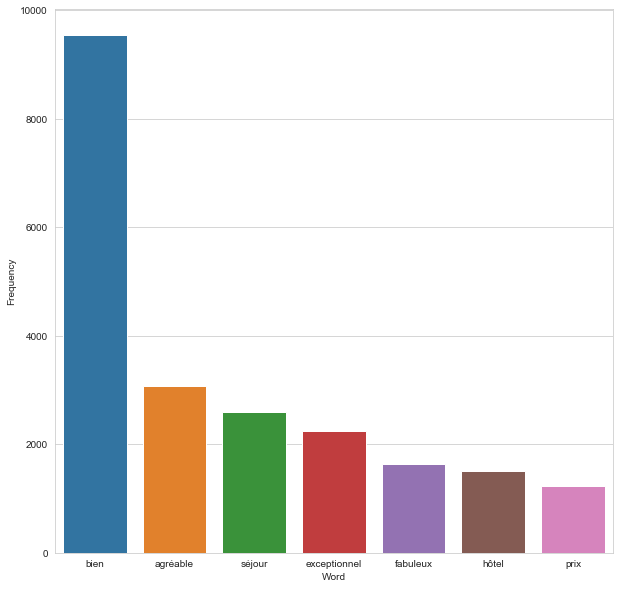

In [26]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

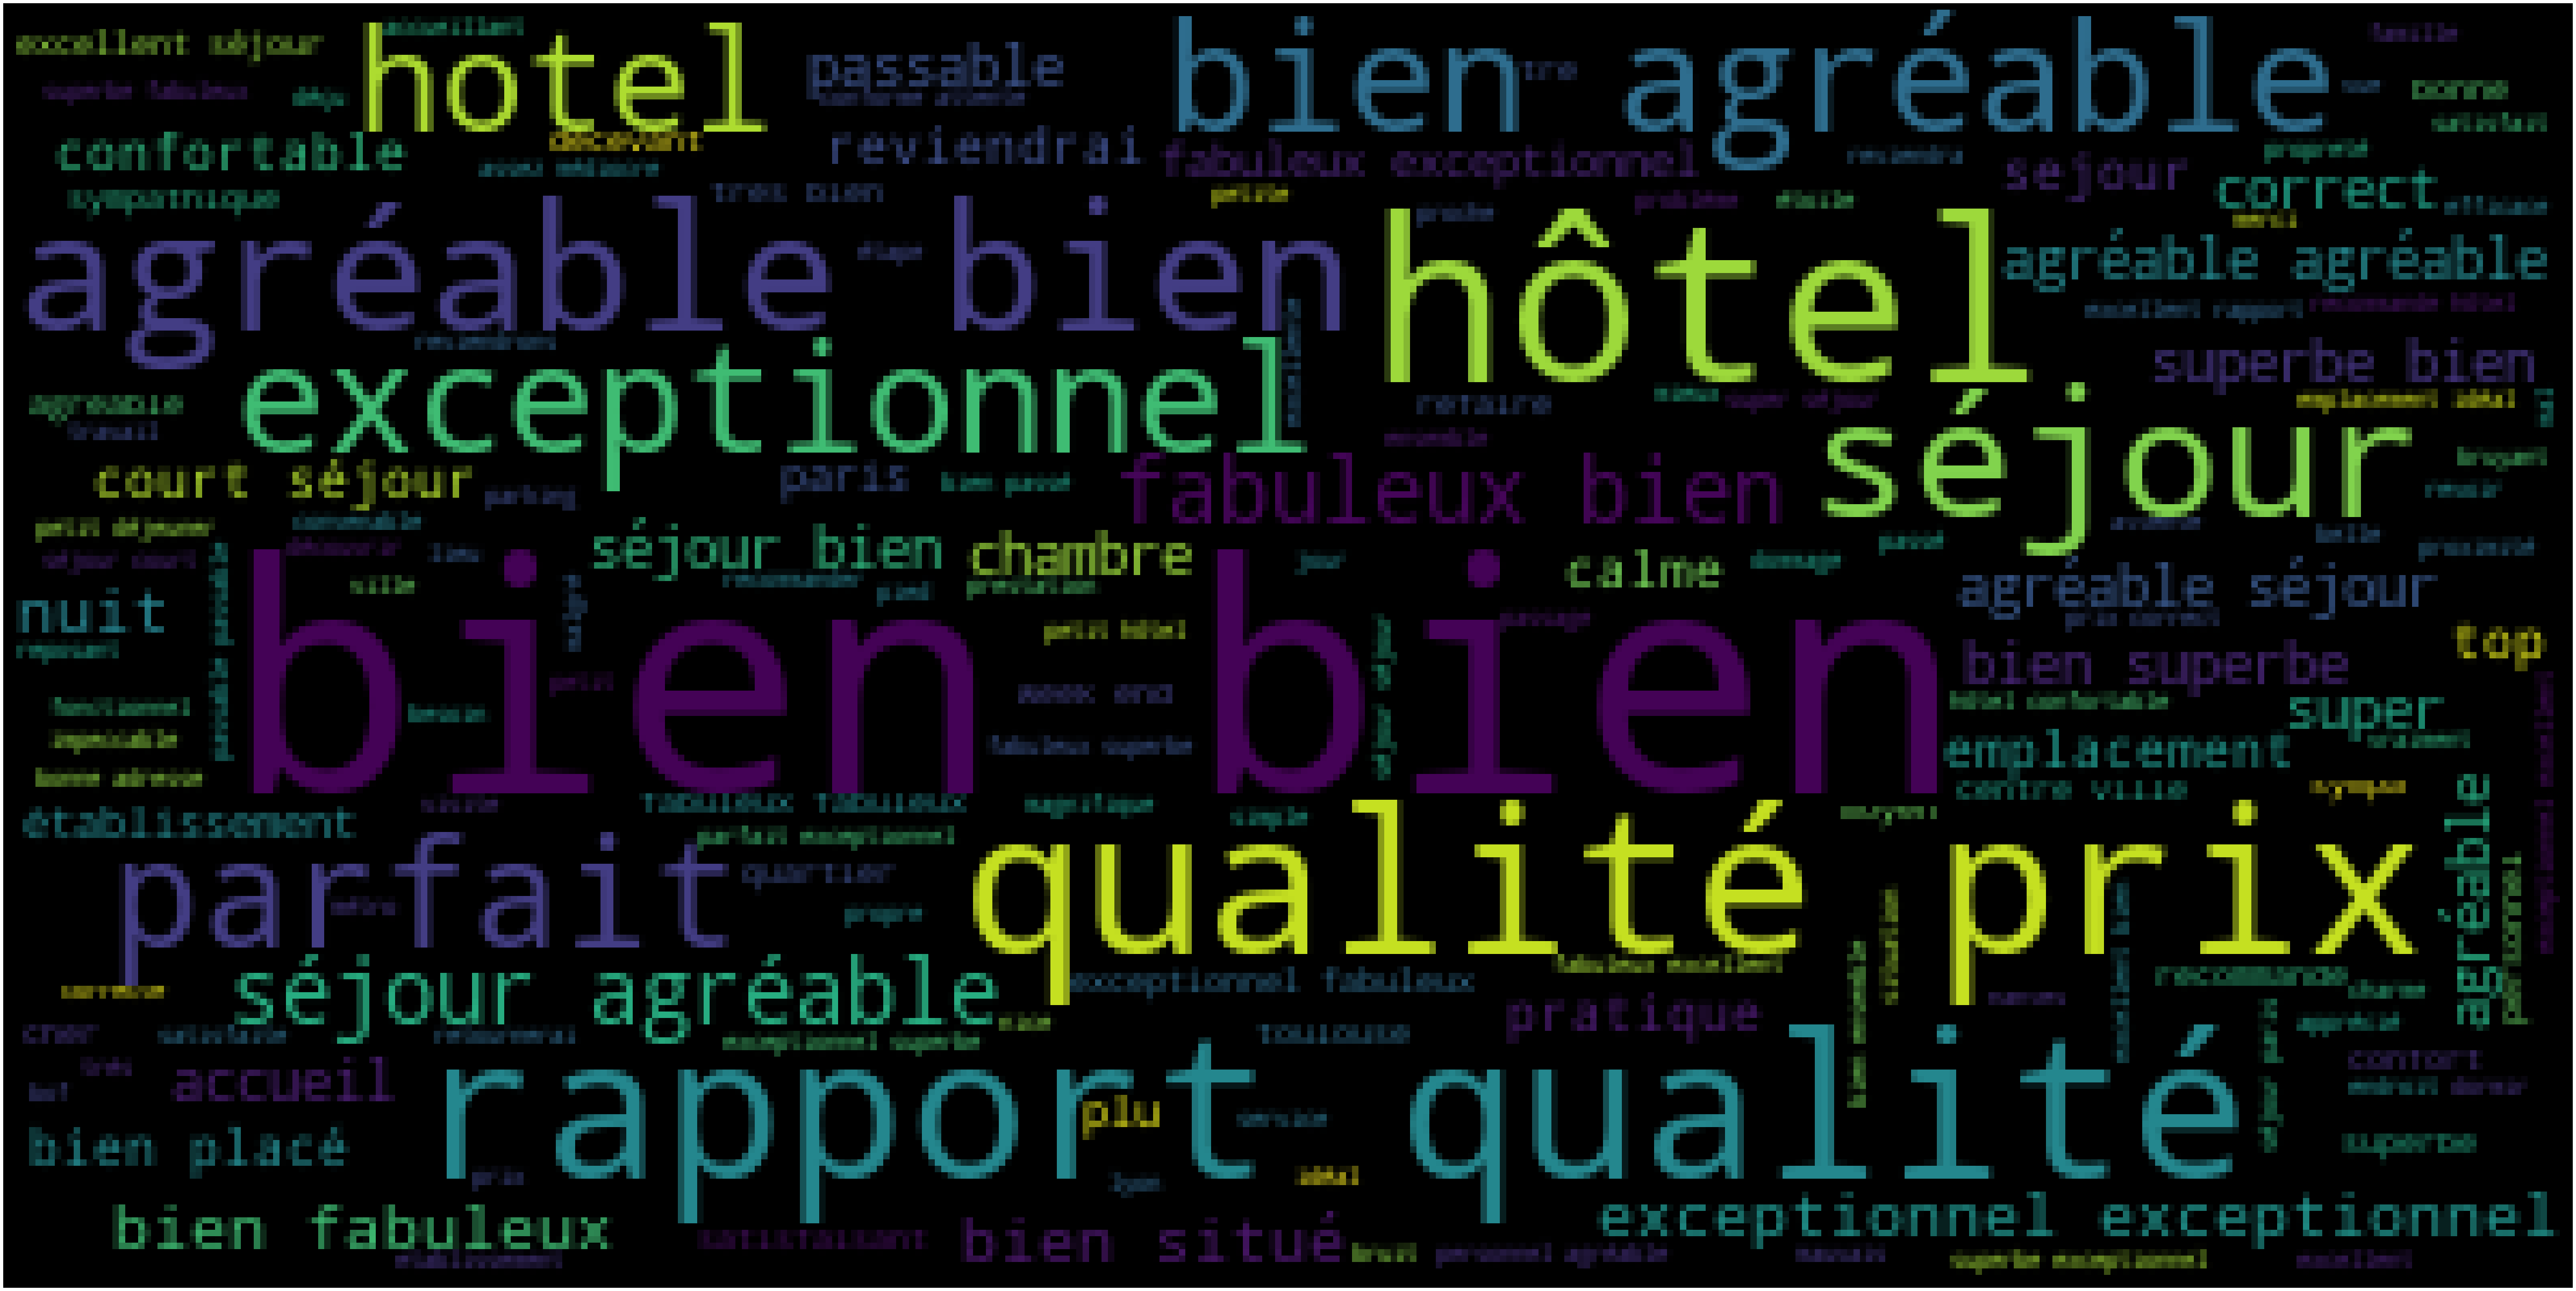

In [27]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [28]:
#mettre tous les éléments en miniscule, séparés par un espace
a = df['bons_points'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres and retourner une liste de mots
b = re.sub('[^a-zàâéèêëïîôùûç]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

In [29]:
#supprimer les caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [30]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

,Word,Frequency
0,personnel,7096
1,petit,6657
2,chambre,6587
3,déjeuner,5299
4,bien,5126
5,accueil,4875
6,emplacement,4508


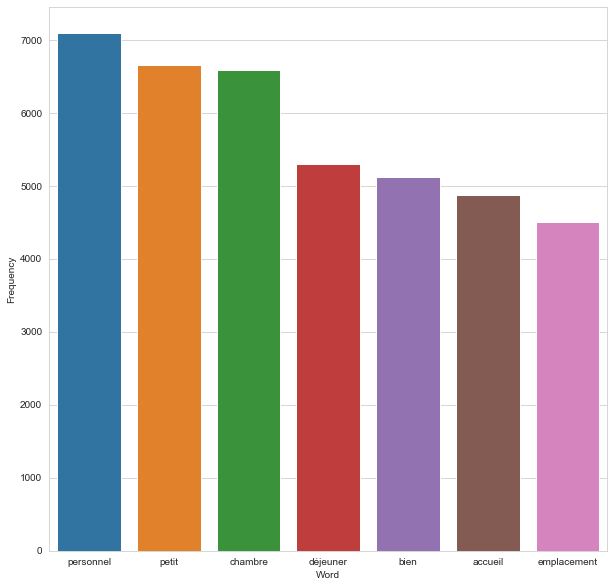

In [31]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

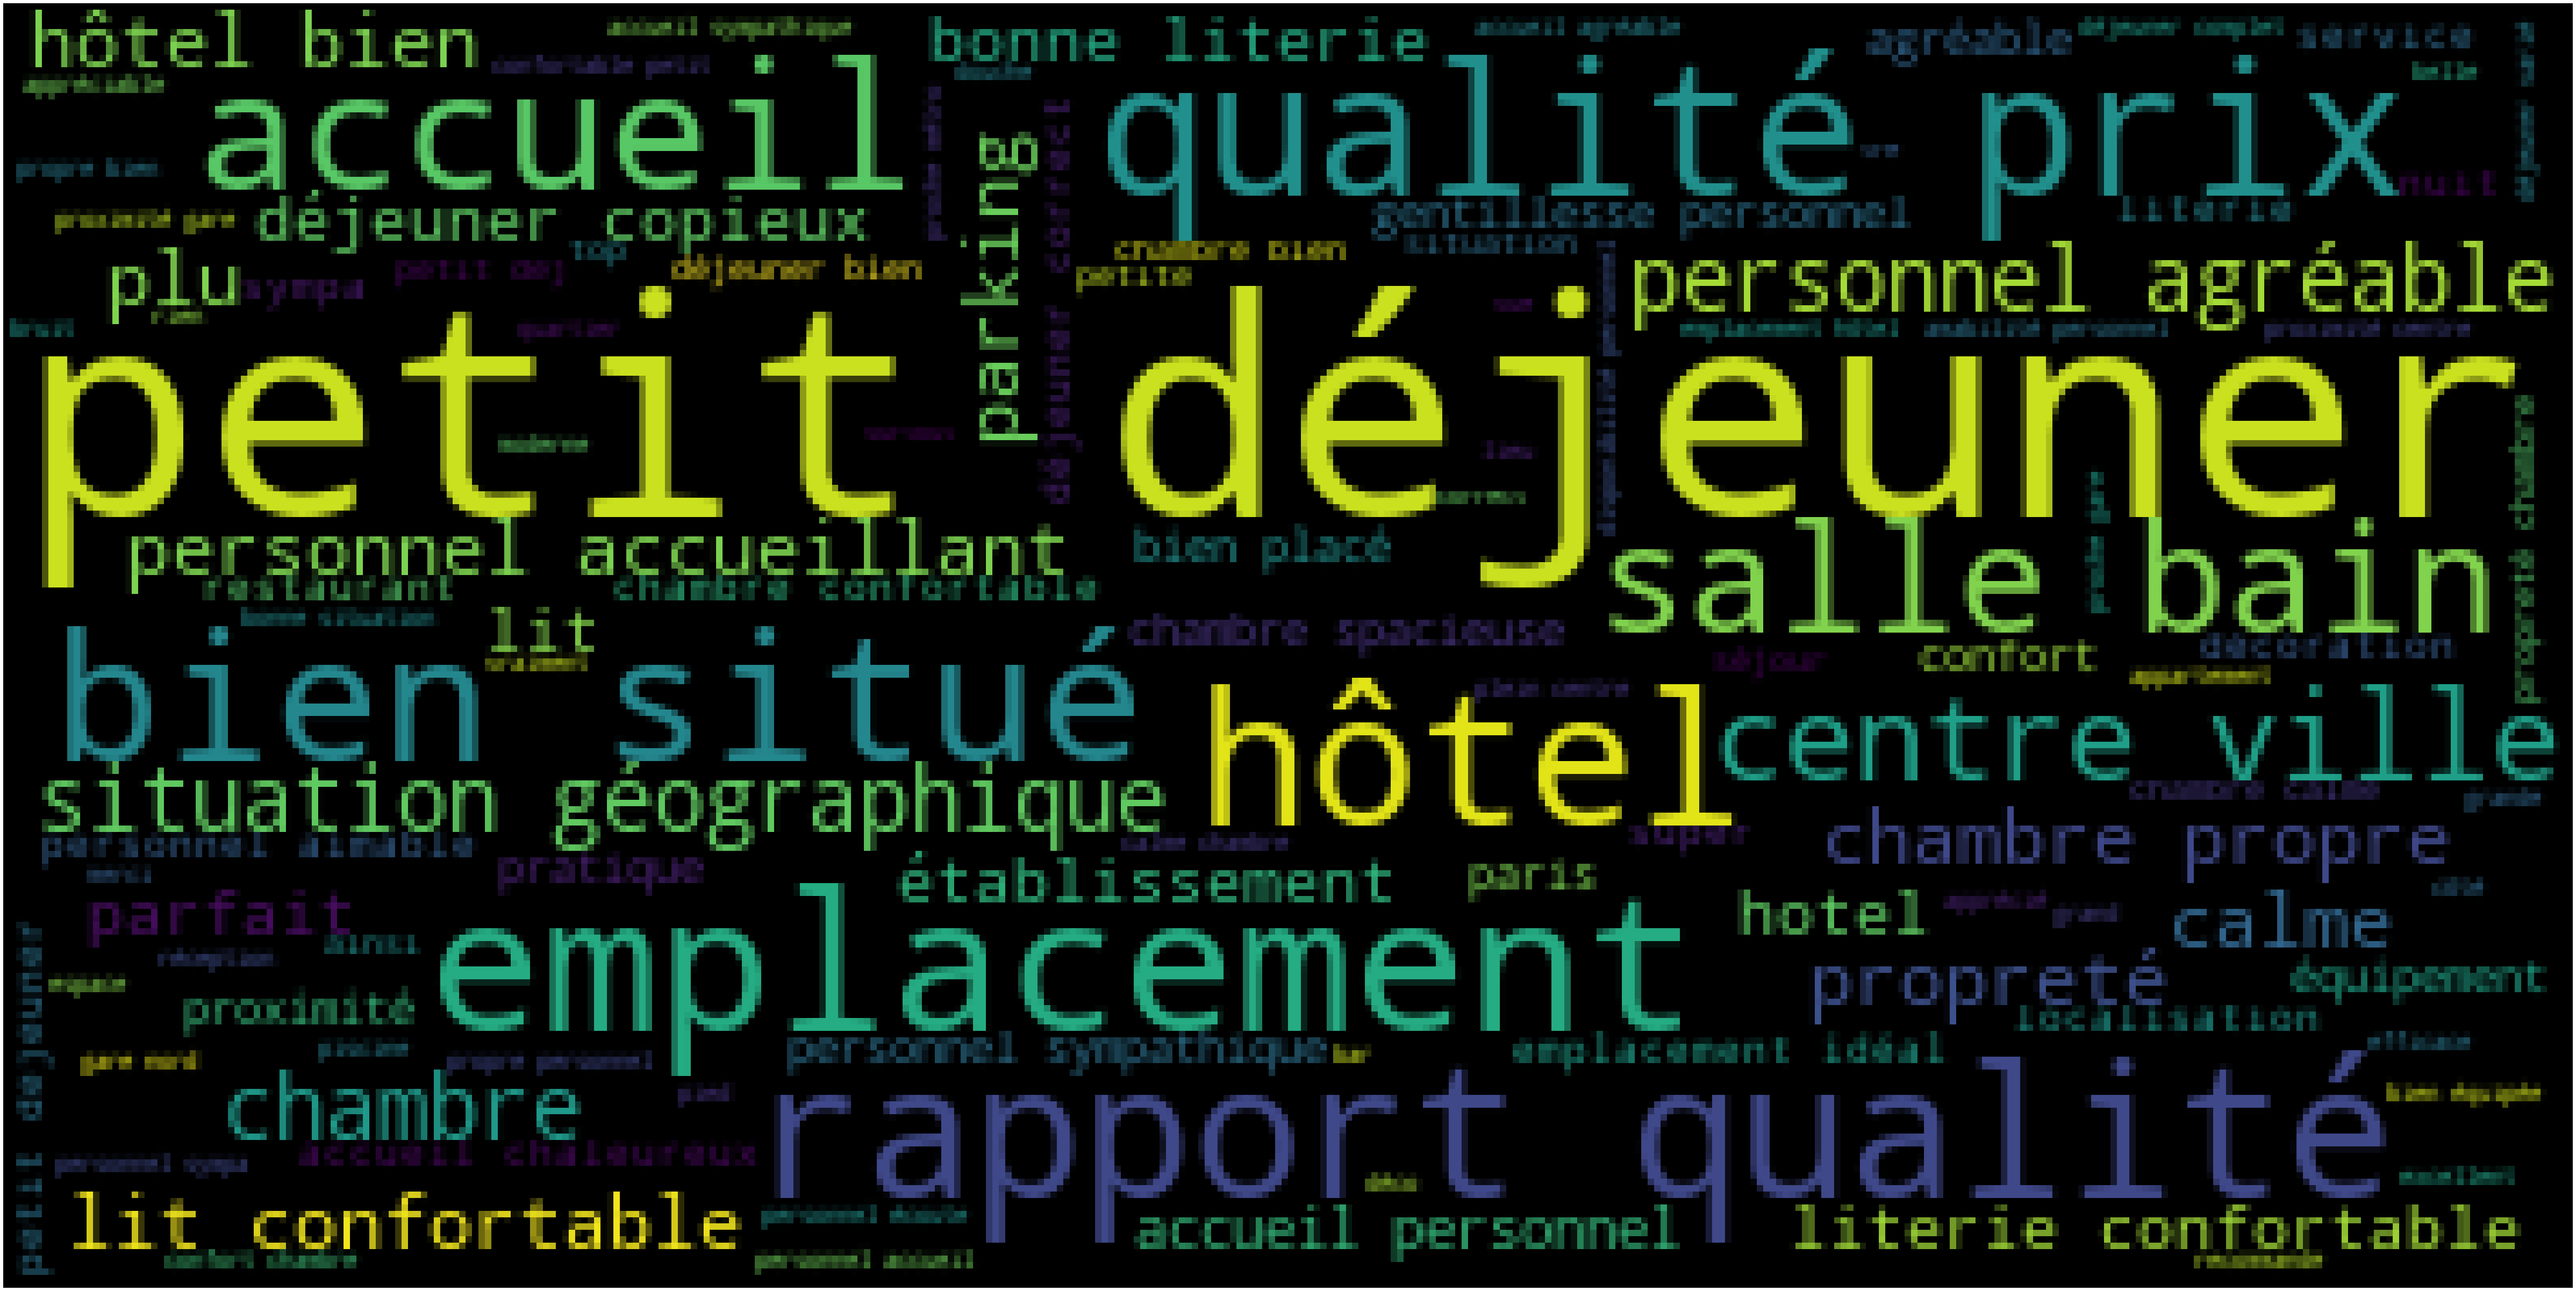

In [32]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [33]:
#mettre tous les éléments en miniscule, séparés par un espace
a = df['mauvais_points'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres and retourner une liste de mots
b = re.sub('[^A-Za-zàâéèêëïîôùûç]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

#supprimer caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [34]:
#supprimer caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [35]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

,Word,Frequency
0,chambre,6337
1,petit,3380
2,salle,3138
3,déjeuner,2309
4,bain,2243
5,douche,2047
6,rien,1998


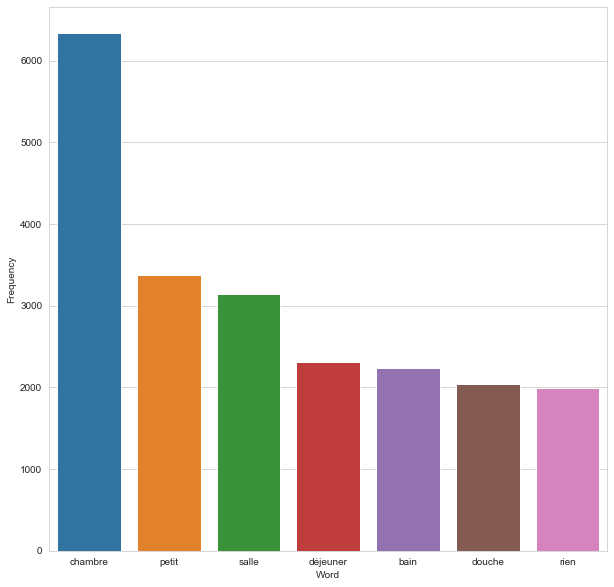

In [36]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

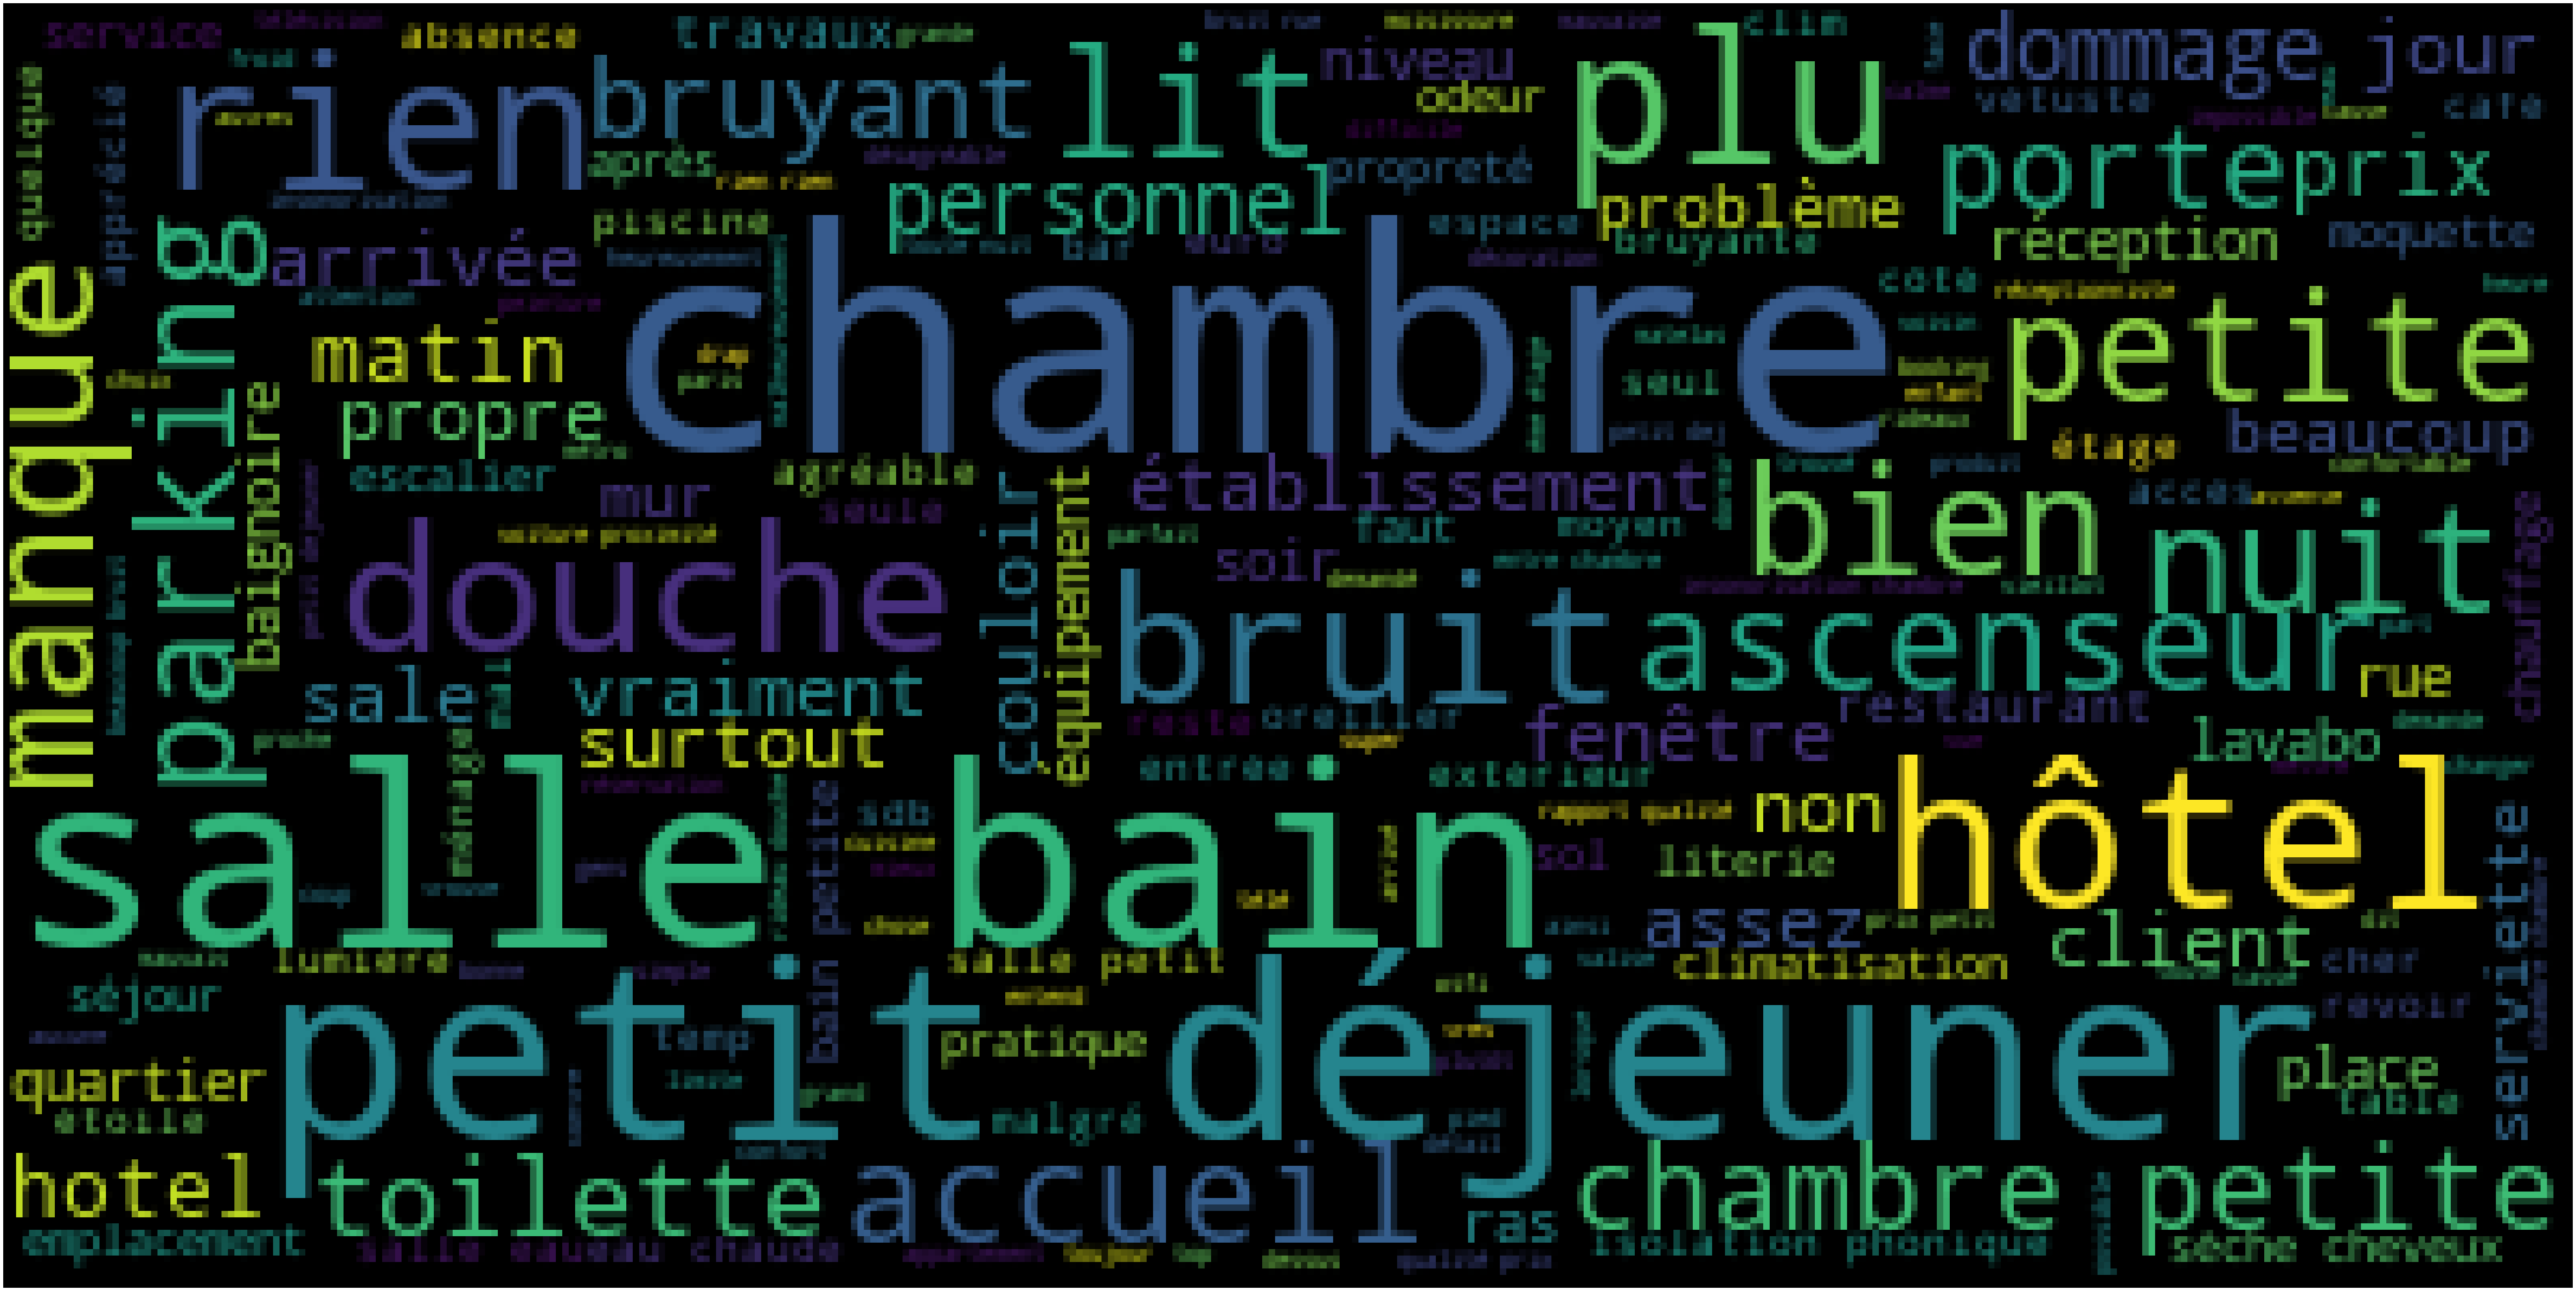

In [37]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [38]:
#vérification que les NaN dans la colonne 'mauvais points' ont bien de façon certaine une polarité de zéro pour TextBlob, 
#sentiment[0]=polarite et sentiment[1]=subjectivité
#text = u"NaN"
#blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
#blob.sentiment
#print('NaN a une polarité de {} et une subjectivité de {}.'.format(blob.sentiment[0], blob.sentiment[1]))

In [39]:
#suppression des Nan
#df = df.fillna('')
#suppression de deux phrases récurrentes dans les données
#df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

#df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [40]:
#suppression de deux phrases récurrentes dans les données
#df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

#df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [41]:
#concaténation 
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
df22 = pd.DataFrame(df, columns= ['bons_points', 'mauvais_points'])

df23=df22['bons_points']
df24=df22['mauvais_points']

In [42]:
df23=pd.DataFrame(data=df23)
#df23['polarite']=1
df23.head()

,bons_points
0,"Établissement recent, propre, soigne, chouette..."
1,"Accueil très chaleureux, chambre calme...tout ..."
2,Tout bié sauf le wifi catastrophiquement lent!...
3,
4,Excellent rapport qualité prix. Personnel très...


In [43]:
df24=pd.DataFrame(data=df24)
#df24['polarité']=0
df24.columns = ['bons_points']
df24.head()

,bons_points
0,Rien
1,
2,
3,Hôtel parfait. Quartier sympa.
4,


In [44]:
frames = [df23, df24]
result = pd.concat(frames)
result

,bons_points
0,"Établissement recent, propre, soigne, chouette..."
1,"Accueil très chaleureux, chambre calme...tout ..."
2,Tout bié sauf le wifi catastrophiquement lent!...
3,
4,Excellent rapport qualité prix. Personnel très...
...,...
30941,C'est regrettable de ne pas avoir de plateau d...
30942,Rien tout étais au top! Merci!
30943,Rien
30944,


In [45]:
df21 = result['bons_points']
df21 = pd.DataFrame(df21, columns=['bons_points'])

In [46]:
df21.head()

,bons_points
0,"Établissement recent, propre, soigne, chouette..."
1,"Accueil très chaleureux, chambre calme...tout ..."
2,Tout bié sauf le wifi catastrophiquement lent!...
3,
4,Excellent rapport qualité prix. Personnel très...


In [47]:
df21.columns=['sentences']

In [48]:
#mettre les commentaires du dataframe en miniscule
df21['sentences']=df21['sentences'].str.lower()
df21.head()

,sentences
0,"établissement recent, propre, soigne, chouette..."
1,"accueil très chaleureux, chambre calme...tout ..."
2,tout bié sauf le wifi catastrophiquement lent!...
3,
4,excellent rapport qualité prix. personnel très...


In [49]:
df21.shape

(58844, 1)

In [50]:
#remplacement de tout ce qui n'est pas dans le set[] par un espace
df21['sentences'] = df21['sentences'].apply(lambda x: re.sub('[^a-zàâéèêëïîôùûçæœ-]+',' ', str(x))) 
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [51]:
from nltk.corpus import stopwords
stop = stopwords.words('french')

In [52]:
#suppression des mots "vides" dans le dataframe
df21['sentences'] = df21['sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [53]:
#suppression des mots d'une longueur inférieure à 2 caractères
#\b=la fin et le début d'un mot
#`r' ou`R': préfixe pour les chaines de caractère 
df21['sentences']=df21.sentences.str.replace(r'\b(\w{1,2})\b', '')
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [54]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def return_stem(sentence):
    doc = nlp(sentence)
    return [stemmer.stem(X.text) for X in doc]

In [55]:
df22=df21.copy()

In [56]:
type(df22)

pandas.core.frame.DataFrame

In [57]:
df22.head()

,sentences
0,établissement recent propre soigne chouette de...
1,accueil très chaleureux chambre calme tout pas...
2,tout bié sauf wifi catastrophiquement lent meg...
3,
4,excellent rapport qualité prix personnel très ...


In [58]:
#Existe-t-il des variables numériques?
df21['sentences'].apply(lambda x: not any(i.isnumeric() for i in x.split())).any()

False

In [59]:
df21['sentences'].str.contains(r'[0-9]').any()

False

In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
#récupération des commentaires dans le type series
df21 = df21['sentences']
type(df21)

pandas.core.series.Series

In [62]:
#calcul de la polarité des commentaires avec TextBlob
bloblist_desc = list()

df_str=df21.astype(str)
for row in df_str:
    blob = TextBlob(row)
    #print(blob)
    pos_tagger=PatternTagger()
    analyzer=PatternAnalyzer()
    blob = tb(str(blob)) #textblob
    #sentiment renvoie un tuple avec la polarité et la subjectivite
    #print(blob.sentiment[0])
    #type(blob.sentiment[0])
    bloblist_desc.append(blob.sentiment[0])
    #df_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentiment'])

In [63]:
#récupération des résultats de la polarité dans un dataframe
df_polarity_desc1 = pd.DataFrame(data = bloblist_desc)
df_polarity_desc1.columns = ['sentiment']
df_polarity_desc1.head()

,sentiment
0,0.261429
1,0.422500
2,-0.066667
3,0.000000
4,0.487500


In [64]:
#classification des commentaires selon trois modalités (neutres, positifs et négatifs) dans un dataframe
def f(df_polarity_desc1):
    if df_polarity_desc1['sentiment'] > 0:
        val = "positive"
    elif df_polarity_desc1['sentiment'] < 0:
        val = "negative"
    else :
        val = "neutre"
    return val

df_polarity_desc1.apply(f, axis=1)
df_polarity_desc1['polarite']=df_polarity_desc1.apply(f, axis=1)

In [65]:
df_polarity_desc1.head()

,sentiment,polarite
0,0.261429,positive
1,0.422500,positive
2,-0.066667,negative
3,0.000000,neutre
4,0.487500,positive


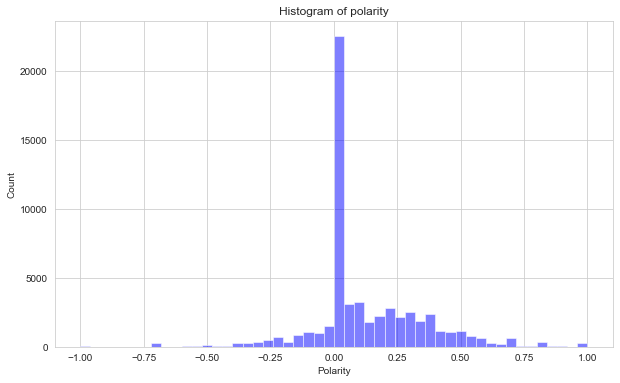

In [66]:
#fonction de masse de la polarité des commentaires
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_polarity_desc1.sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

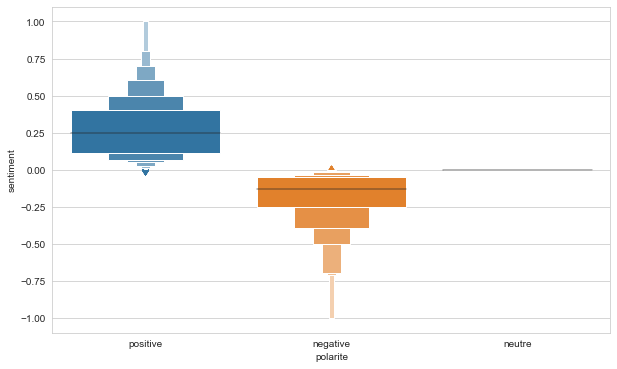

In [67]:
#boxenplot de la polarité des commenatires, boxplot avec plus de quartiles
plt.figure(figsize=(10,6))
sns.boxenplot(x='polarite', y='sentiment', data=df_polarity_desc1)
plt.show();

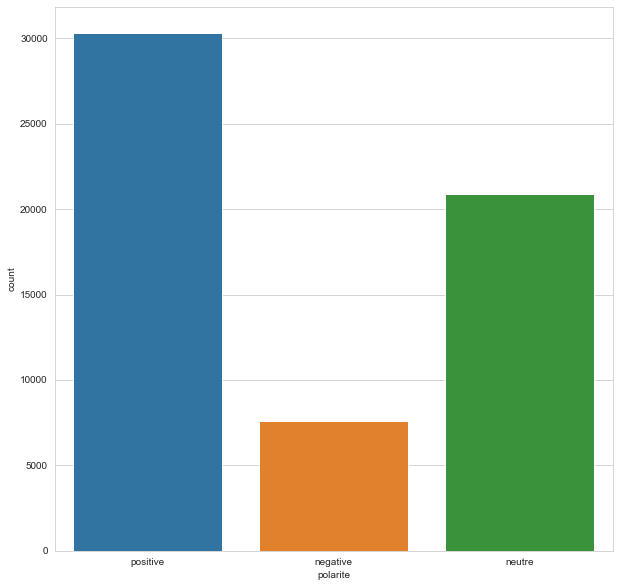

In [68]:
#countplot des modalités correspondant à la polarité des commentaires
df_polarity_desc1.head()
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="polarite", data=df_polarity_desc1)

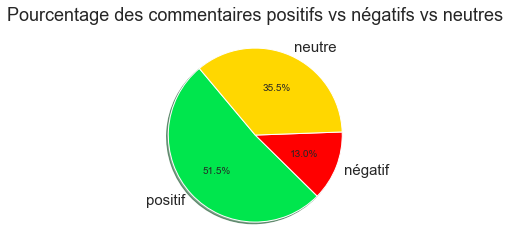

In [69]:
#diagramme circulaire des modalités de la polarité des commentaires
pourcentage_positive = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "positive")])) / len(df_polarity_desc1)
pourcentage_negative = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "negative")])) / len(df_polarity_desc1)
pourcentage_neutre = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "neutre")])) / len(df_polarity_desc1)

fig1, ax1 = plt.subplots()

plt.title("Pourcentage des commentaires positifs vs négatifs vs neutres", fontsize=18)
labels = ['positif', 'négatif', 'neutre']
sizes = [pourcentage_positive, pourcentage_negative, pourcentage_neutre]
#explode = (0, 0.2)  # seulement détacher le second groupe

patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow = True, startangle=130, colors = ['#00e64d', 'r', '#FFD700'])
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
texts[2].set_fontsize(15)

matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [6, 6]

In [70]:
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')
df23=df['note']
df24=df['note']
frames = [df23, df24]
df_notes = pd.concat(frames)
df_notes.shape

(61892,)

In [71]:
type(df_notes)

pandas.core.series.Series

In [72]:
df_polarity_desc1_polarite = df_polarity_desc1.iloc[:,1]
#df_polarity_desc1_polarite = pd.DataFrame(df_polarity_desc1_polarite)
df_polarity_desc1_polarite.head()

0    positive
1    positive
2    negative
3      neutre
4    positive
Name: polarite, dtype: object

In [73]:
df_notes.reset_index(drop=True, inplace=True)
df_polarity_desc1_polarite.reset_index(drop=True, inplace=True)
df_corr = pd.concat([df_polarity_desc1_polarite, df_notes], axis = 1)

In [74]:
df_corr.head()

,polarite,note
0,positive,10.0
1,positive,9.0
2,negative,9.6
3,neutre,10.0
4,positive,9.0


In [75]:
df_corr=df_corr.loc[(df_corr.polarite=='positive')|(df_corr.polarite=='negative')]

In [76]:
type(df_corr)

pandas.core.frame.DataFrame

In [77]:
df_corr.head()

,polarite,note
0,positive,10.0
1,positive,9.0
2,negative,9.6
4,positive,9.0
5,positive,7.9


In [78]:
df_corr['polarite'] = np.where(df_corr['polarite'] == 'positive', 1, 0)
df_corr.head()

,polarite,note
0,1,10.0
1,1,9.0
2,0,9.6
4,1,9.0
5,1,7.9


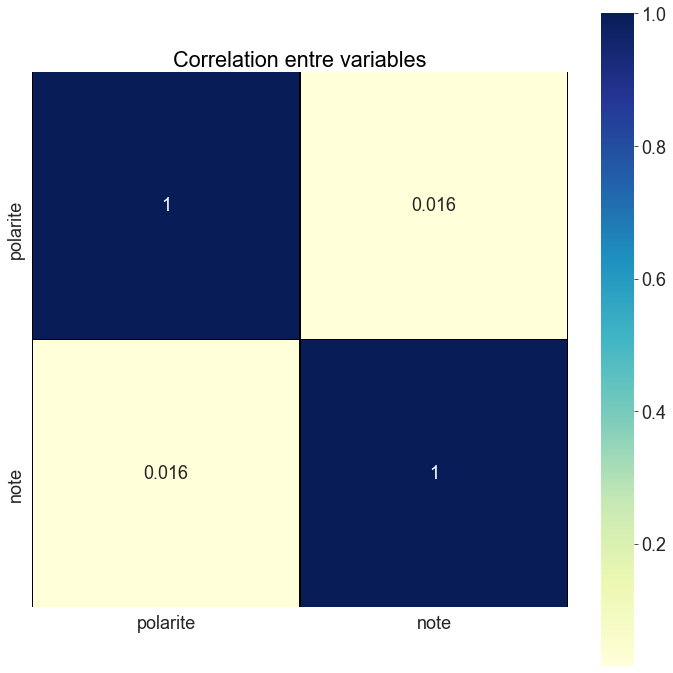

In [79]:
#affichage des corrélations entre variables
#parfaite si r = 1
#très forte si r > 0,8
#forte si r se situe entre 0,5 et 0,8
#d'intensité moyenne si r se situe entre 0,2 et 0,5
#faible si r se situe entre 0 et 0.2

f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(df_corr.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

In [80]:
#concaténation des trois colonnes correspondant aux commentaires sur les hôtels
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
df22 = pd.DataFrame(df, columns= ['titre', 'bons_points', 'mauvais_points'])

df21 = df22['titre'].map(str) + ' ' + df22['bons_points'].map(str) + ' ' + df22['mauvais_points'].map(str)

df21

0        Exceptionnel Établissement recent, propre, soi...
1        Fabuleux  Accueil très chaleureux, chambre cal...
2        Exceptionnel Tout bié sauf le wifi catastrophi...
3          Exceptionnel nan Hôtel parfait. Quartier sympa.
4        Fabuleux  Excellent rapport qualité prix. Pers...
                               ...                        
30941    Exceptionnel L'hôtel est agréable et confortab...
30942    Exceptionnel La chambre, le personnel au top e...
30943    Hôtel très confortable La chambre, ses équipem...
30944         Déjà utilisé plusieurs fois Salle claire nan
30945           Bien  La situation face à la gare Le bruit
Length: 30946, dtype: object

In [81]:
#convertir series en dataframe
df21 = df21.to_frame(name="sentences")

In [82]:
#mettre les commentaires du dataframe en miniscule
df21['sentences']=df21['sentences'].str.lower()
df21.head()

,sentences
0,"exceptionnel établissement recent, propre, soi..."
1,"fabuleux accueil très chaleureux, chambre cal..."
2,exceptionnel tout bié sauf le wifi catastrophi...
3,exceptionnel nan hôtel parfait. quartier sympa.
4,fabuleux excellent rapport qualité prix. pers...


In [83]:
#remplacement de tout ce qui n'est pas dans le set[] par un espace
df21['sentences'] = df21['sentences'].apply(lambda x: re.sub('[^a-zàâéèêëïîôùûçæœ-]+',' ', str(x))) 
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [84]:
#suppression des mots "vides" dans le dataframe
stop = stopwords.words('french')
df21['sentences'] = df21['sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [85]:
#suppression des mots d'une longueur inférieure à 2 caractères
#\b=la fin et le début d'un mot
#`r' ou`R': préfixe pour les chaines de caractère 
df21['sentences']=df21.sentences.str.replace(r'\b(\w{1,2})\b', '')
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [86]:
df22=df21.copy()

In [87]:
type(df22)

pandas.core.frame.DataFrame

In [88]:
df22.head()

,sentences
0,exceptionnel établissement recent propre soign...
1,fabuleux accueil très chaleureux chambre calme...
2,exceptionnel tout bié sauf wifi catastrophique...
3,exceptionnel nan hôtel parfait quartier sympa
4,fabuleux excellent rapport qualité prix person...


In [89]:
#Existe-t-il des variables numériques?
df21['sentences'].apply(lambda x: not any(i.isnumeric() for i in x.split())).any()

False

In [90]:
#récupération des commentaires dans le type series
df21 = df21['sentences']
type(df21)

pandas.core.series.Series

In [91]:
#calcul de la polarité des commentaires avec TextBlob
bloblist_desc = list()

df_str=df21.astype(str)
for row in df_str:
    blob = TextBlob(row)
    #print(blob)
    pos_tagger=PatternTagger()
    analyzer=PatternAnalyzer()
    blob = tb(str(blob)) #textblob
    #sentiment renvoie un tuple avec la polarité et la subjectivite
    #print(blob.sentiment[0])
    #type(blob.sentiment[0])
    bloblist_desc.append(blob.sentiment[0])
    #df_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentiment'])

In [92]:
#récupération des résultats de la polarité dans un dataframe
df_polarity_desc1 = pd.DataFrame(data = bloblist_desc)
df_polarity_desc1.columns = ['sentiment']
df_polarity_desc1.head()

,sentiment
0,2.537500e-01
1,5.380000e-01
2,1.387779e-17
3,4.000000e-01
4,5.900000e-01


In [93]:
#classification des commentaires selon trois modalités (neutres, positifs et négatifs) dans un dataframe
def f(df_polarity_desc1):
    if df_polarity_desc1['sentiment'] > 0:
        val = "positive"
    elif df_polarity_desc1['sentiment'] < 0:
        val = "negative"
    else :
        val = "neutre"
    return val

df_polarity_desc1.apply(f, axis=1)
df_polarity_desc1['polarite']=df_polarity_desc1.apply(f, axis=1)

In [94]:
#sélection de la colonne notes 
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')
df_notes = df.iloc[:,7]
#df_notes = pd.DataFrame(data=df_notes)
df_notes.head()

0    10.0
1     9.0
2     9.6
3    10.0
4     9.0
Name: note, dtype: float64

In [95]:
#sélection de la colonne polarite
df_polarity_desc1_polarite = df_polarity_desc1.iloc[:,1]
#df_polarity_desc1_polarite = pd.DataFrame(df_polarity_desc1_polarite)
df_polarity_desc1_polarite.head()

0    positive
1    positive
2    positive
3    positive
4    positive
Name: polarite, dtype: object

In [96]:
#concaténation de la colonne notes et polarite
df_corr = pd.concat([df_polarity_desc1_polarite, df_notes], axis = 1)

In [97]:
#sélection des modalités postives ou négatives
df_corr=df_corr.loc[(df_corr.polarite=='positive')|(df_corr.polarite=='negative')]

In [98]:
#transformation des valeurs de la polarite en code binaire 0 et 1
df_corr['polarite'] = np.where(df_corr['polarite'] == 'positive', 1, 0)
df_corr.head()

,polarite,note
0,1,10.0
1,1,9.0
2,1,9.6
3,1,10.0
4,1,9.0


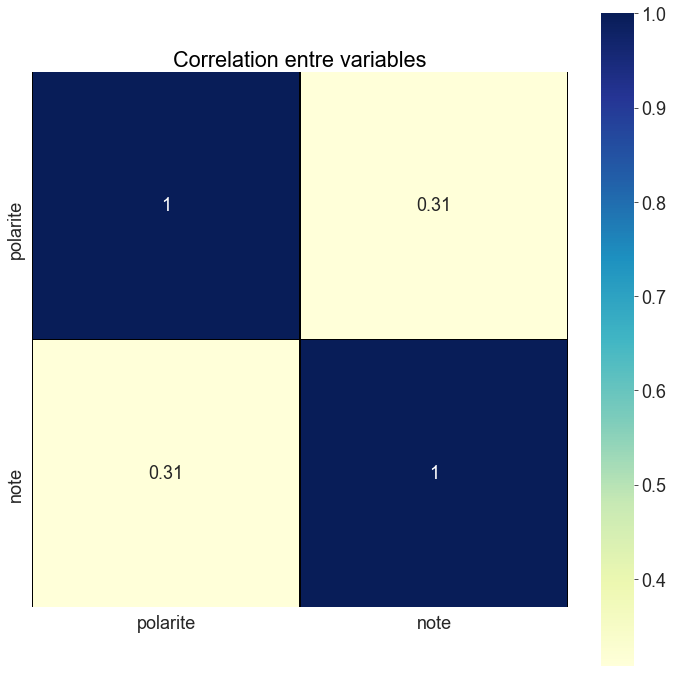

In [99]:
#affichage des corrélations entre variables
#parfaite si r = 1
#très forte si r > 0,8
#forte si r se situe entre 0,5 et 0,8
#d'intensité moyenne si r se situe entre 0,2 et 0,5
#faible si r se situe entre 0 et 0.2

f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(df_corr.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

In [100]:
#df_polarity_desc1.head()

In [101]:
#df_polarity_desc1.columns

In [102]:
#Transformation des valeurs de la variable polarite en 1 et 0
#pas besoin d'utiliser le module scikit-learn car on peut le faire directement 
df_polarity_desc1['polarite'] = np.where(df_polarity_desc1['polarite'] == 'positive', 1, 0)
df_polarity_desc1 = df_polarity_desc1.reset_index(drop=True)
df_polarity_desc1.head()

,sentiment,polarite
0,2.537500e-01,1
1,5.380000e-01,1
2,1.387779e-17,1
3,4.000000e-01,1
4,5.900000e-01,1


In [103]:
#supression de la colonne sentiment
df_polarity_desc1.drop(['sentiment'],1,inplace=True)
df_polarity_desc1.head()

,polarite
0,1
1,1
2,1
3,1
4,1


In [104]:
#création d'un dataframe comments avec la colonne sentences
df21.head()
comments = pd.DataFrame(data=df21)
comments.columns = ['sentences']
comments.head()
comments.shape
type(comments)

pandas.core.frame.DataFrame

In [105]:
#df_polarity_desc1.shape
#type(df_polarity_desc1)

In [106]:
#concaténation de la colonne sentences et la colonne polarite
dataset = pd.concat([comments, df_polarity_desc1])

In [107]:
comments.reset_index(drop=True, inplace=True)
df_polarity_desc1.reset_index(drop=True, inplace=True)
# fusion des deux datasets en un seul que l'on nommera df
df = pd.concat([df_polarity_desc1, comments], axis = 1)
#df.head(100)

In [108]:
#renommer les colonnes
df.columns=['sentiment', 'sentence']
df.head()

,sentiment,sentence
0,1,exceptionnel établissement recent propre soign...
1,1,fabuleux accueil très chaleureux chambre calme...
2,1,exceptionnel tout bié sauf wifi catastrophique...
3,1,exceptionnel nan hôtel parfait quartier sympa
4,1,fabuleux excellent rapport qualité prix person...


In [109]:
#supression des données manquantes
df.isnull().values.any()
df.isnull().sum()
df=df.dropna()

In [110]:
#vérification des données manquantes
df.isnull().sum()

sentiment    0
sentence     0
dtype: int64

In [111]:
#création d'un csv contenant le dataframe df utilisé pour le machine learning
df.to_csv('booking.csv', index=True)

<h1>3. Machine learning</h1>

In [112]:
#création jeux train et test
X_train, X_test, y_train, y_test = train_test_split(df[['sentence']], df['sentiment'])

In [113]:
#CountVectorizer de Scikit-learn est utilisé pour transformer un corpus de mots en vecteurs/occurence des mots 
#Tf signifie term-frequency tandis que tfidf signifie inverse document-frequency 
pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe.fit(X_train['sentence'])
feat_train = pipe.transform(X_train['sentence'])
feat_train.shape

(23209, 15922)

In [114]:
#minimum et maximum pour feat_train
feat_train.min(), feat_train.max()

(0.0, 1.0)

In [115]:
#transformer sans entrainer sur notre jeu test
feat_test = pipe.transform(X_test['sentence'])
feat_test.shape

(7737, 15922)

In [116]:
#arbre de décision
#définir les paramètres
#le paramètre max_depth est un seuil sur la profondeur maximale de l’arbre
"""L'indice de diversité de gini : probabilité pour chaque élément d'être choisi multipliée 
par la probabilité qu'il soit mal classé"""
"""L'entropie au lieu d'utiliser les probabilités simples applique le log2 des probabilités"""
param_grid = {'max_depth' : [400, 500], 
              'criterion' : ['gini', 'entropy']}
             
dtc = DecisionTreeClassifier(random_state=42)

dtc_grid = GridSearchCV(dtc, param_grid, cv=3)
 
#entrainer le modèle à partir de Grid Search
%time DTC = dtc_grid.fit(feat_train, y_train)

print(dtc_grid.best_score_.round(5))
print(dtc_grid.best_params_)

final_model = dtc_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 28.4 s
0.90986
{'criterion': 'entropy', 'max_depth': 400}


In [117]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       1.00      1.00      1.00     19216

    accuracy                           1.00     23209
   macro avg       1.00      1.00      1.00     23209
weighted avg       1.00      1.00      1.00     23209



In [118]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1240
           1       0.95      0.95      0.95      6497

    accuracy                           0.92      7737
   macro avg       0.85      0.86      0.86      7737
weighted avg       0.92      0.92      0.92      7737



In [119]:
def MatriceConfusion(model):
    y_pred = model.predict(feat_test)
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, pred_test)
    plt.matshow(cm)
    plt.title('Matrice de confusion', y=1.12)
    plt.colorbar()
    print(cm)
    plt.show()

[[ 947  293]
 [ 311 6186]]


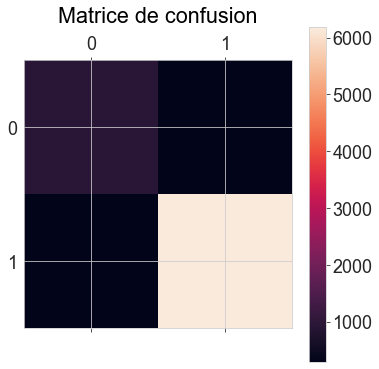

In [120]:
y_prediction = MatriceConfusion(DTC)

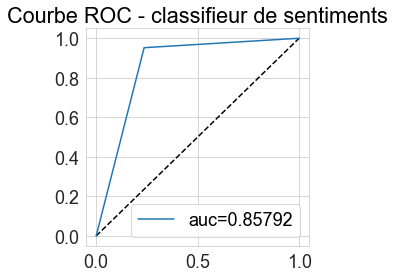

In [121]:
score = final_model.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [122]:
"""n_estimators = le nombre d'arbres dans la fôrét"""
"""Le Bootstrapping est un procédé qui permet d’augmenter artificiellement le nombre d’observation d’un 
échantillon de données sans pour autant modifier la distribution des variables présentes dans le jeu de 
données. Le principe est simple, on dispose d’un jeu de données contenant n observations, pour créer un 
échantillon de taille n  on tire avec remise n observations parmi le jeu de données original"""
param_grid = {'max_depth' : [400, 500],
             'n_estimators' : [50, 70],
              'bootstrap' : [True, False],
              'criterion' : ['gini','entropy']}

rfc = RandomForestClassifier(random_state=42)

rfc_grid = GridSearchCV(rfc, param_grid, cv = 3)

%time RFC = rfc_grid.fit(feat_train, y_train)

print(rfc_grid.best_score_.round(5))
print(rfc_grid.best_params_)

final_model = rfc_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 16min 16s
0.92559
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 500, 'n_estimators': 50}


In [123]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       1.00      1.00      1.00     19216

    accuracy                           1.00     23209
   macro avg       1.00      1.00      1.00     23209
weighted avg       1.00      1.00      1.00     23209



In [124]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1240
           1       0.94      0.99      0.96      6497

    accuracy                           0.94      7737
   macro avg       0.94      0.83      0.87      7737
weighted avg       0.94      0.94      0.93      7737



[[ 820  420]
 [  57 6440]]


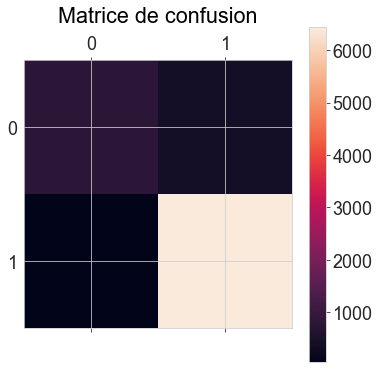

In [125]:
y_pred = MatriceConfusion(RFC)

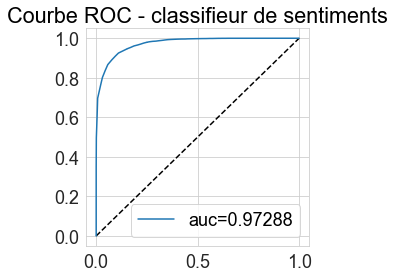

In [126]:
score = final_model.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [127]:
"""L1 : Lasso et L2 : Ridge, pénalité, c’est une modification qu’on apporte à la fonction de coût 
afin de maîtriser l’arbitrage entre biais vs variance"""
"""la fonction de coût est définie comme le carré de la différence entre la valeur prévue et la 
valeur réelle en fonction de l'intrant."""
"""quand le biais augmente, la variance baisse."""
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 1.78 s
0.92615
{'penalty': 'l2'}


In [128]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      3993
           1       0.95      0.99      0.97     19216

    accuracy                           0.95     23209
   macro avg       0.96      0.88      0.91     23209
weighted avg       0.95      0.95      0.95     23209



In [129]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      1240
           1       0.94      0.99      0.97      6497

    accuracy                           0.94      7737
   macro avg       0.94      0.83      0.87      7737
weighted avg       0.94      0.94      0.94      7737



[[ 819  421]
 [  46 6451]]


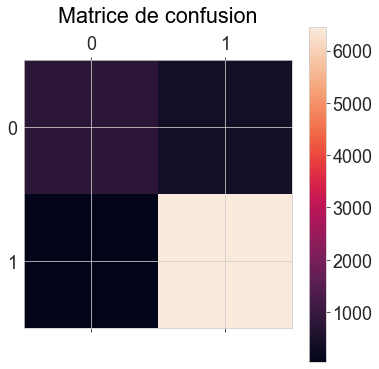

In [130]:
y_pred = MatriceConfusion(LR)

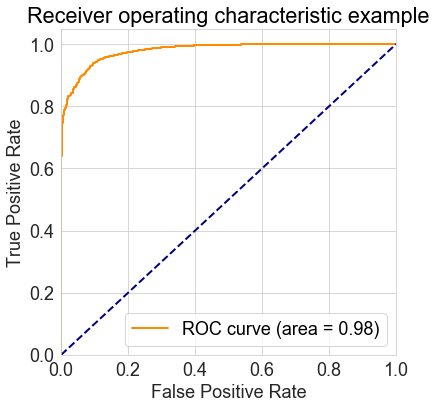

In [131]:
y_score = final_model.decision_function(feat_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [132]:
#bagging
"""Le mot Bagging est une contraction de Bootstrap Aggregation : sélection de sous-ensembles aléatoires de
l'ensemble des données d'origine, puis agrégation des prédictions individuelles pour former une prédiction
finale""" 

naivebayes = nb.BernoulliNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 1000, warm_start = True, bootstrap_features=True, max_samples=0.9)
modelB_fit = modelB.fit(feat_train, y_train)
modelB_fit.score(feat_test,y_test)
pred_train = modelB.predict(feat_train)
pred_test = modelB.predict(feat_test)

In [133]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      3993
           1       0.95      0.94      0.94     19216

    accuracy                           0.91     23209
   macro avg       0.83      0.85      0.84     23209
weighted avg       0.91      0.91      0.91     23209



In [134]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66      1240
           1       0.93      0.94      0.94      6497

    accuracy                           0.89      7737
   macro avg       0.81      0.79      0.80      7737
weighted avg       0.89      0.89      0.89      7737



[[ 787  453]
 [ 368 6129]]


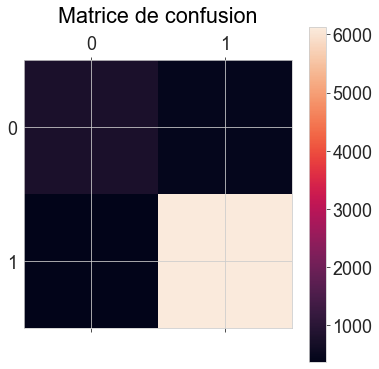

In [135]:
y_pred = MatriceConfusion(modelB_fit)

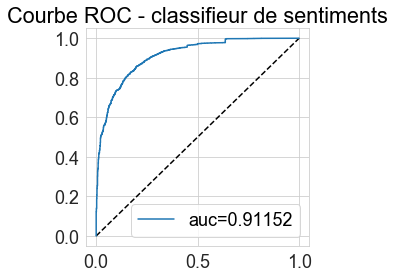

In [136]:
score = modelB_fit.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [173]:
param_grid = {#'C': [10, 50, 100,200],
              #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}

svm = SVC(random_state=42)

svm_grid = GridSearchCV(svm, param_grid, cv=3)

%time SVM = svm_grid.fit(feat_train, y_train)

print(svm_grid.best_score_.round(5))
print(svm_grid.best_params_)

Wall time: 4min 19s
0.93322
{'kernel': 'rbf'}


In [138]:
final_model = svm_grid.best_estimator_

In [139]:
pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

In [140]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3993
           1       0.99      1.00      1.00     19216

    accuracy                           1.00     23209
   macro avg       1.00      0.99      0.99     23209
weighted avg       1.00      1.00      1.00     23209



In [141]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1240
           1       0.95      0.99      0.97      6497

    accuracy                           0.95      7737
   macro avg       0.95      0.86      0.90      7737
weighted avg       0.95      0.95      0.95      7737



[[ 894  346]
 [  44 6453]]


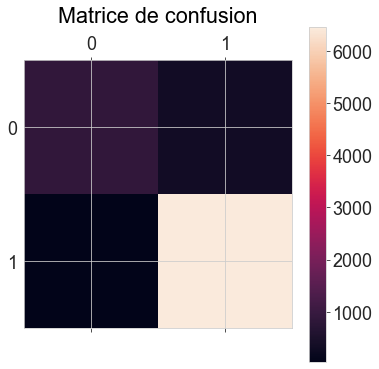

In [142]:
y_pred = MatriceConfusion(SVM)

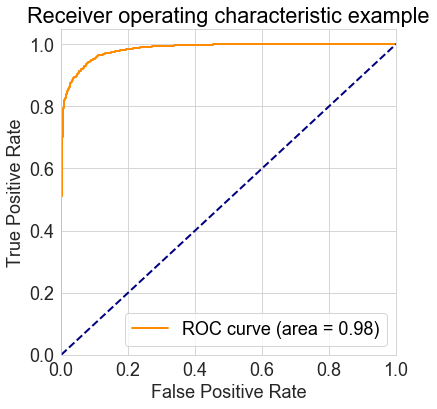

In [176]:
y_score = SVM.decision_function(feat_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [174]:
#gradient boosting = boosting + descente de gradient
#fonctionne de manière très similaire au forêts aléatoires pour la classification.
#néanmoins, les arbres ne sont plus appris indépendamment des autres 
"""Le BOOSTING est une technique ensembliste qui consiste à agréger des classifieurs (modèles) élaborés 
séquentiellement sur un échantillon d’apprentissage dont les poids des individus sont corrigés au fur et 
à mesure. Les classifieurs sont pondérés selon leurs performances"""
gbc40 = GradientBoostingClassifier(n_estimators=50, max_depth=500, learning_rate=0.08)
gbc40.fit(feat_train, y_train)
gbc40.score(feat_test, y_test)

0.9281375210029728

In [167]:
#gradient boosting = boosting + descente de gradient
#fonctionne de manière très similaire au forêts aléatoires pour la classification.
#néanmoins, les arbres ne sont plus appris indépendamment des autres 
"""Le BOOSTING est une technique ensembliste qui consiste à agréger des classifieurs (modèles) élaborés 
séquentiellement sur un échantillon d’apprentissage dont les poids des individus sont corrigés au fur et 
à mesure. Les classifieurs sont pondérés selon leurs performances"""
gbc40 = GradientBoostingClassifier(n_estimators=50, max_depth=500, learning_rate=0.6)
gbc40.fit(feat_train, y_train)
gbc40.score(feat_test, y_test)

0.934858472276076

In [145]:
#param_grid = {
    #"learning_rate": [0.01, 0.1, 0.2],
    #"max_depth":[400, 500],
    #"criterion": ["friedman_mse", "mae", "mse"],
    #'n_estimators' : [50, 70]}

#gbc=GradientBoostingClassifier(random_state=42)

#gbc_grid = GridSearchCV(gbc, param_grid, cv = 3)

#%time GBC = gbc_grid.fit(feat_train, y_train)
#print (gbc_grid.best_score_.round(5))
#print(gbc_grid.best_params_)

#final_model = gbc_grid.best_estimator_

#pred_train = final_model.predict(feat_train) 
#pred_test = final_model.predict(feat_test)

In [177]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3993
           1       0.99      1.00      1.00     19216

    accuracy                           1.00     23209
   macro avg       1.00      0.99      0.99     23209
weighted avg       1.00      1.00      1.00     23209



In [178]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1240
           1       0.95      0.99      0.97      6497

    accuracy                           0.95      7737
   macro avg       0.95      0.86      0.90      7737
weighted avg       0.95      0.95      0.95      7737



[[ 894  346]
 [  44 6453]]


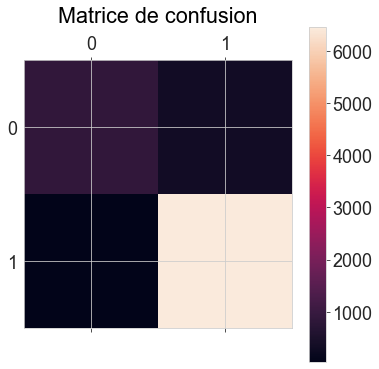

In [179]:
y_pred = MatriceConfusion(gbc40)

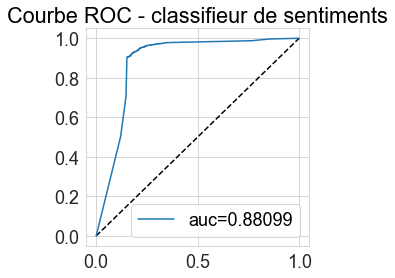

In [180]:
score = gbc40.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [216]:
#un n-gramme est “une sous-séquence de n éléments construite à partir d’une séquence donnée.” 
#n-gramme permet de créer un modèle probabiliste pour anticiper le prochain élément d’une suite
#padding="remplissage"
generated_ngrams = ngrams(word_tokenize(X_train.iloc[0,0]), 3, pad_left=True, pad_right=True)
list(generated_ngrams)[:7]

[(None, None, 'fabuleux'),
 (None, 'fabuleux', 'absolument'),
 ('fabuleux', 'absolument', 'tout'),
 ('absolument', 'tout', 'absolument'),
 ('tout', 'absolument', 'rien'),
 ('absolument', 'rien', None),
 ('rien', None, None)]

In [217]:
#ngram_range of (1, 2) means unigrams and bigrams
#Un 2-gram (or bi-gram) est une séquance de 2 mots : “please turn”, “turn your” 
pipe2 = make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                      TfidfTransformer())
pipe2.fit(X_train['sentence'])
feat_train2 = pipe2.transform(X_train['sentence'])
feat_train2.shape

(23209, 173546)

In [218]:
#get_feature_names() - retourne une liste de feature names, classés par leurs indices
cl = pipe2.steps[0]
cl[1].get_feature_names()[:10]

['abandon',
 'abandon chambre',
 'abandon commune',
 'abandon rideaux',
 'abandon tout',
 'abandonne',
 'abandonne jamain',
 'abandonné',
 'abandonné personne',
 'abandonnée']

In [219]:
feat_test2 = pipe2.transform(X_test['sentence'])

In [220]:
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train2, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

Wall time: 9.69 s
0.90034
{'penalty': 'l2'}


In [223]:
feat_test2 = pipe2.transform(X_test['sentence'])

In [224]:
final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train2) 
pred_test = final_model.predict(feat_test2)

In [225]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      3993
           1       0.93      1.00      0.97     19216

    accuracy                           0.94     23209
   macro avg       0.96      0.83      0.88     23209
weighted avg       0.94      0.94      0.94     23209



In [226]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      3993
           1       0.93      1.00      0.97     19216

    accuracy                           0.94     23209
   macro avg       0.96      0.83      0.88     23209
weighted avg       0.94      0.94      0.94     23209



In [227]:
"""SVD est une technique de factorisation matricielle qui factorise une matrice M dans les trois matrices U,
Σ  et V. Très similaire à l'ACP, sauf que la factorisation pour SVD est effectuée sur la matrice de données, tandis que pour PCA, est une technique de factorisation matricielle qui factorise une matrice M dans les trois matrices U, Σ et V.Ceci est très similaire à l'ACP, sauf que la factorisation pour SVD est effectuée sur la matrice de données, 
pas sur la matrice de covariance."""
#n_components, dimensions qui doivent être inférieures aux colonnes
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=300))
pipe_svd.fit(X_train['sentence'])
feat_train_svd = pipe_svd.transform(X_train['sentence'])
feat_train_svd.shape

(23209, 300)

In [228]:
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train_svd, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

Wall time: 2.86 s
0.9321
{'penalty': 'l2'}


In [229]:
feat_test_svd = pipe_svd.transform(X_test['sentence'])

In [230]:
final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train_svd) 
pred_test = final_model.predict(feat_test_svd)

In [231]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3993
           1       0.96      0.97      0.96     19216

    accuracy                           0.94     23209
   macro avg       0.90      0.89      0.89     23209
weighted avg       0.94      0.94      0.94     23209



In [232]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1240
           1       0.96      0.97      0.96      6497

    accuracy                           0.93      7737
   macro avg       0.89      0.87      0.88      7737
weighted avg       0.93      0.93      0.93      7737



In [ ]:
clf_svd = RandomForestClassifier(n_estimators=50, max_depth=40, random_state=42)
clf_svd.fit(feat_train_svd, y_train)

In [ ]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
feat_test_svd = pipe_svd.transform(X_test['sentence'])
clf_svd.score(feat_test_svd, y_test)

In [ ]:
lr_svd = LogisticRegression()
lr_svd.fit(feat_train_svd, y_train)
lr_svd.score(feat_test_svd, y_test)

In [ ]:
pipe_svd_tfidf = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     TruncatedSVD(n_components=300))
pipe_svd_tfidf.fit(X_train['sentence'])
feat_train_svd_tfidf = pipe_svd_tfidf.transform(X_train['sentence'])

clf_svd_tfidf = LogisticRegression()
clf_svd_tfidf.fit(feat_train_svd_tfidf, y_train)

feat_test_svd_tfidf = pipe_svd_tfidf.transform(X_test['sentence'])
clf_svd_tfidf.score(feat_test_svd_tfidf, y_test)

In [ ]:
sentance = [list(tokenize(s, deacc=True, lower=True)) for s in X_train['sentence']]
sentance[0]

In [ ]:
model = word2vec.Word2Vec(sentance, size=300, window=20,
                          min_count=2, workers=1, iter=100)
model.corpus_count

In [ ]:
vocab = model.wv.vocab
list(vocab)[:5]

In [ ]:
model.save('trained_word2vec.bin')

In [ ]:
model.wv['exceptionnel'].shape, model.wv['exceptionnel'][:10]

In [ ]:
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(X_train["sentence"], model)
wv_train_feat.shape

In [ ]:
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, y_train)

In [ ]:
wv_test_feat = word2vec_features(X_test["sentence"], model)

In [ ]:
clfwv.score(wv_test_feat, y_test)

In [ ]:
words = list(sorted(model.wv.vocab))
words[:10]

In [ ]:
subset = ['exceptionnel', 'personnel', words[3], words[4], words[5]]
rows = []
for w in subset:
    for ww in subset:
        rows.append(dict(w1=w, w2=ww, d=model.wv.similarity(w, ww)))
import pandas
pandas.DataFrame(rows).pivot("w1", "w2", "d")

In [ ]:
# y variable dépendante et X variables indépendantes
#X = df.iloc[:, df.columns !='polaritecomments'].values
#y = df.iloc[:, 5].values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#print (X_train.shape,y_train.shape)
#print (X_test.shape, y_test.shape)

In [ ]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
#train = pd.DataFrame(X_train)

In [ ]:
#train.hist(figsize=(13,50),color='blue',bins=40,layout=(8,3))
#plt.show()

In [ ]:
#param_grid = {'max_depth' : [3, 10, 15],
#    'random_state': [0, 42],
#             'n_estimators' : [10, 50]}
#grid = GridSearchCV( RandomForestClassifier(), param_grid)

#%time grid.fit(X_train, y_train)
#print(grid.best_params_)

#model = grid.best_estimator_
#yfit = model.predict(X_test)

In [ ]:
#weights = (y == 0).sum() / (1.0 * (y == 1).sum())

In [ ]:
#def get_score(model,X_train,X_test,y_train,y_test):
    #model.fit(X_train,y_train)
    #return model.score(X_test,y_test)

In [ ]:
kf = KFold(n_splits=3)

LR = LogisticRegression()
SVM = SVC()
NB = nb.BernoulliNB()
DTC = DecisionTreeClassifier(max_depth = 5, random_state= 42)
RF = RandomForestClassifier(max_depth = 5, n_estimators= 10, random_state= 42)
XGBC = XGBClassifier(max_depth = 5, scale_pos_weight = weights, \
                n_jobs = 4)

logis=list()
svm=list()
nb=list()
arb=list()
rfl=list()
clf=list()

for index_train, index_test in kf.split(d_model):
    X_train, X_test, y_train, y_test = X[index_train], X[index_test], y[index_train], y[index_test]
    logis.append(get_score(LR, X_train, X_test, y_train, y_test))
    svm.append(get_score(SVM, X_train, X_test, y_train, y_test))
    nb.append(get_score(NB, X_train, X_test, y_train, y_test))
    arb.append(get_score(DTC, X_train, X_test, y_train, y_test))
    rfl.append(get_score(RF, X_train, X_test, y_train, y_test))
    clf.append(get_score(XGBC, X_train, X_test, y_train, y_test))
    
print(np.mean(logis))
print(np.mean(svm))
print(np.mean(arb))
print(np.mean(rfl))
print(np.mean(clf))

In [ ]:
# y variable dépendante et X variables indépendantes
X = d_model.iloc[:, d_model.columns !='isFraud']
Y = d_model.iloc[:, 5]

X_t = pd.DataFrame(X_train)
feature_importances = pd.DataFrame(RF.feature_importances_, index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

In [ ]:
features = X.columns
importances=RF.feature_importances_
indices=np.argsort(importances)
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('importance du score');
plt.ylabel('variables indépendantes');
plt.title('Ordre d\'importance des variables indépendantes');
plt.show()

In [ ]:
def MatriceConfusion (model):
    y_pred = model.predict(X_test)
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.matshow(cm)
    plt.title('Matrice de confusion', y=1.12)
    plt.colorbar()
    print(cm)
    plt.show()

In [ ]:
y_pred = MatriceConfusion(LR)

In [ ]:
#NaiveBayes = muticlasses
#SVM = multiclasses